In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
import os
import re
%matplotlib inline

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
#!pip install scikeras
from sklearn import metrics,linear_model, svm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, BayesianRidge, Lasso, RidgeCV, LassoCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, mean_absolute_error, f1_score
import xgboost as xgb

In [3]:
df_348 = pd.read_excel("withDescriptors_DFT_D3_ACS_AMI_348_hetero_Lattice_Mismatch.xlsx")

In [17]:
df_347 = df_348[abs(df_348['MBT_mismatch']) <=4]

In [22]:
X = df_347.iloc[:,21:]
y = df_347['MBT_mismatch']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [81]:
model_xgb = xgb.XGBRegressor(random_state=42)
# Train model
xgb_optuna = model_xgb.fit(X_train,y_train)

r2_train_xgb = r2_score(y_train, model_xgb.predict(X_train).flatten())
r2_test_xgb = r2_score(y_test, model_xgb.predict(X_test).flatten())

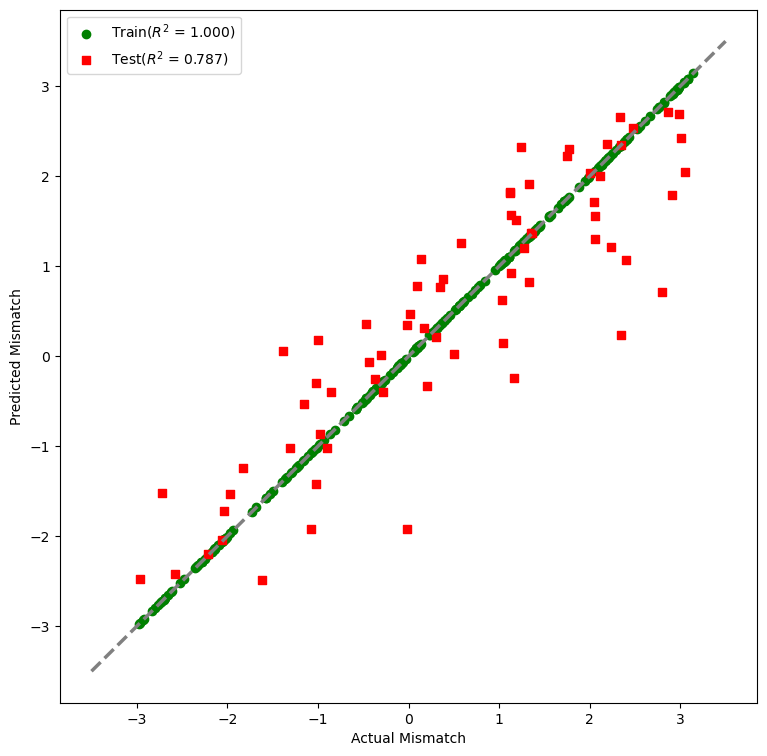

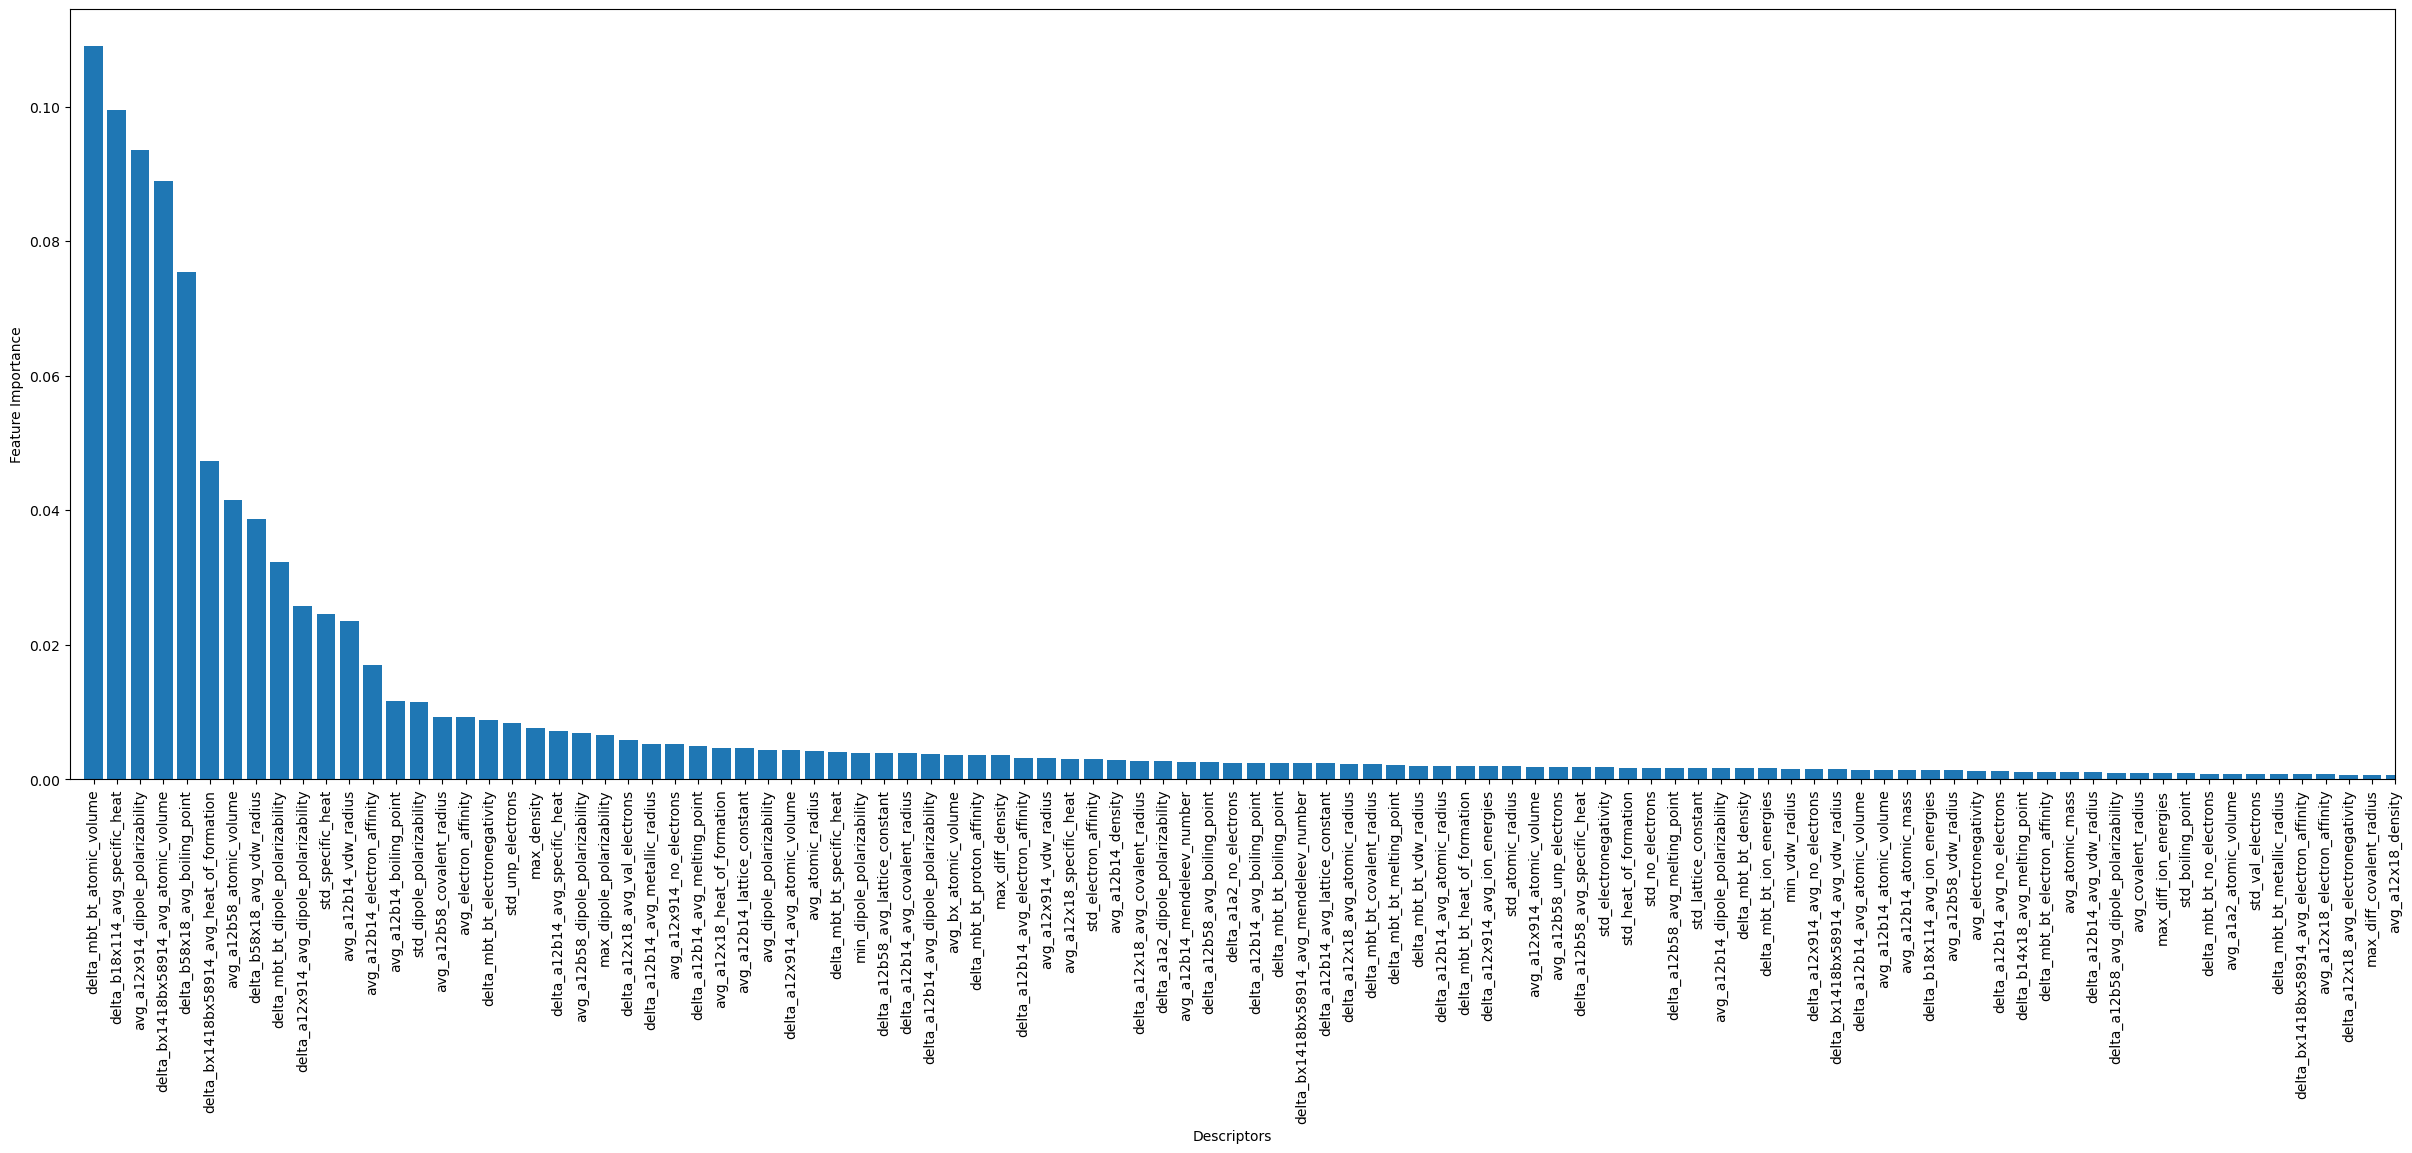

In [82]:
plt.figure(figsize=(9,9))
plt.scatter(y_train, model_xgb.predict(X1_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train_xgb:.3f}')+')',marker='o',color='green')
plt.scatter(y_test, model_xgb.predict(X1_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test_xgb:.3f}')+')',marker='s',color='red')
plt.xlabel('Actual Mismatch')
plt.ylabel('Predicted Mismatch')
plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
importances_xgb = model_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
plt.bar(range(100), importances_xgb[indices_xgb][:100], align='center')
desc_labels = X.columns
plt.xticks(range(100), desc_labels[indices_xgb][:100],  rotation=90)
plt.xlim([-1, 99])
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.show()

In [83]:
for i in range(100):
    print(i, desc_labels[indices_xgb][:100][i], importances_xgb[indices_xgb][:100][i])

0 delta_mbt_bt_atomic_volume 0.10903388
1 delta_b18x114_avg_specific_heat 0.09951182
2 avg_a12x914_dipole_polarizability 0.093521714
3 delta_bx1418bx58914_avg_atomic_volume 0.088897295
4 delta_b58x18_avg_boiling_point 0.075405866
5 delta_bx1418bx58914_avg_heat_of_formation 0.047331918
6 avg_a12b58_atomic_volume 0.041468225
7 delta_b58x18_avg_vdw_radius 0.038696308
8 delta_mbt_bt_dipole_polarizability 0.032258205
9 delta_a12x914_avg_dipole_polarizability 0.025722682
10 std_specific_heat 0.02452757
11 avg_a12b14_vdw_radius 0.023556825
12 avg_a12b14_electron_affinity 0.016919596
13 avg_a12b14_boiling_point 0.011663937
14 std_dipole_polarizability 0.01141583
15 avg_a12b58_covalent_radius 0.00927242
16 avg_electron_affinity 0.009212934
17 delta_mbt_bt_electronegativity 0.008782598
18 std_unp_electrons 0.008399697
19 max_density 0.007623034
20 delta_a12b14_avg_specific_heat 0.007126118
21 avg_a12b58_dipole_polarizability 0.0067869155
22 max_dipole_polarizability 0.006503513
23 delta_a12x18_a

In [84]:
xgb_pd = pd.DataFrame({'descriptor': desc_labels[indices_xgb],
                       'importance': importances_xgb[indices_xgb]})
xgb_pd.to_csv('Results_Lattice_Mismatch/test_xgb_mismatch.csv')

In [99]:
X_xgb = X[desc_labels[indices_xgb][:100]]

In [102]:
model_rf = RandomForestRegressor(random_state=42)
# Train model
rf_optuna = model_rf.fit(X_train,y_train)

r2_train_rf = r2_score(y_train, model_rf.predict(X_train).flatten())
r2_test_rf = r2_score(y_test, model_rf.predict(X_test).flatten())

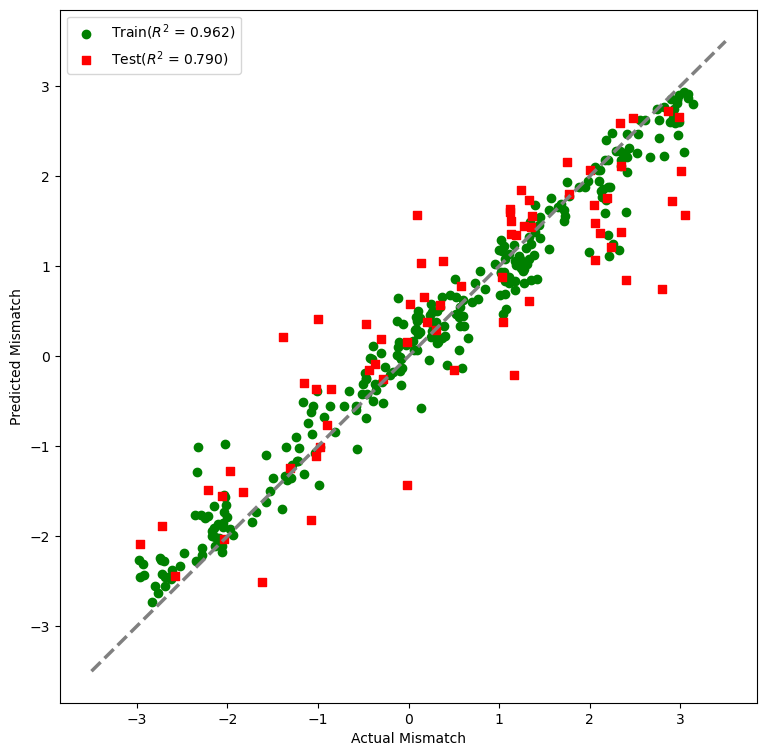

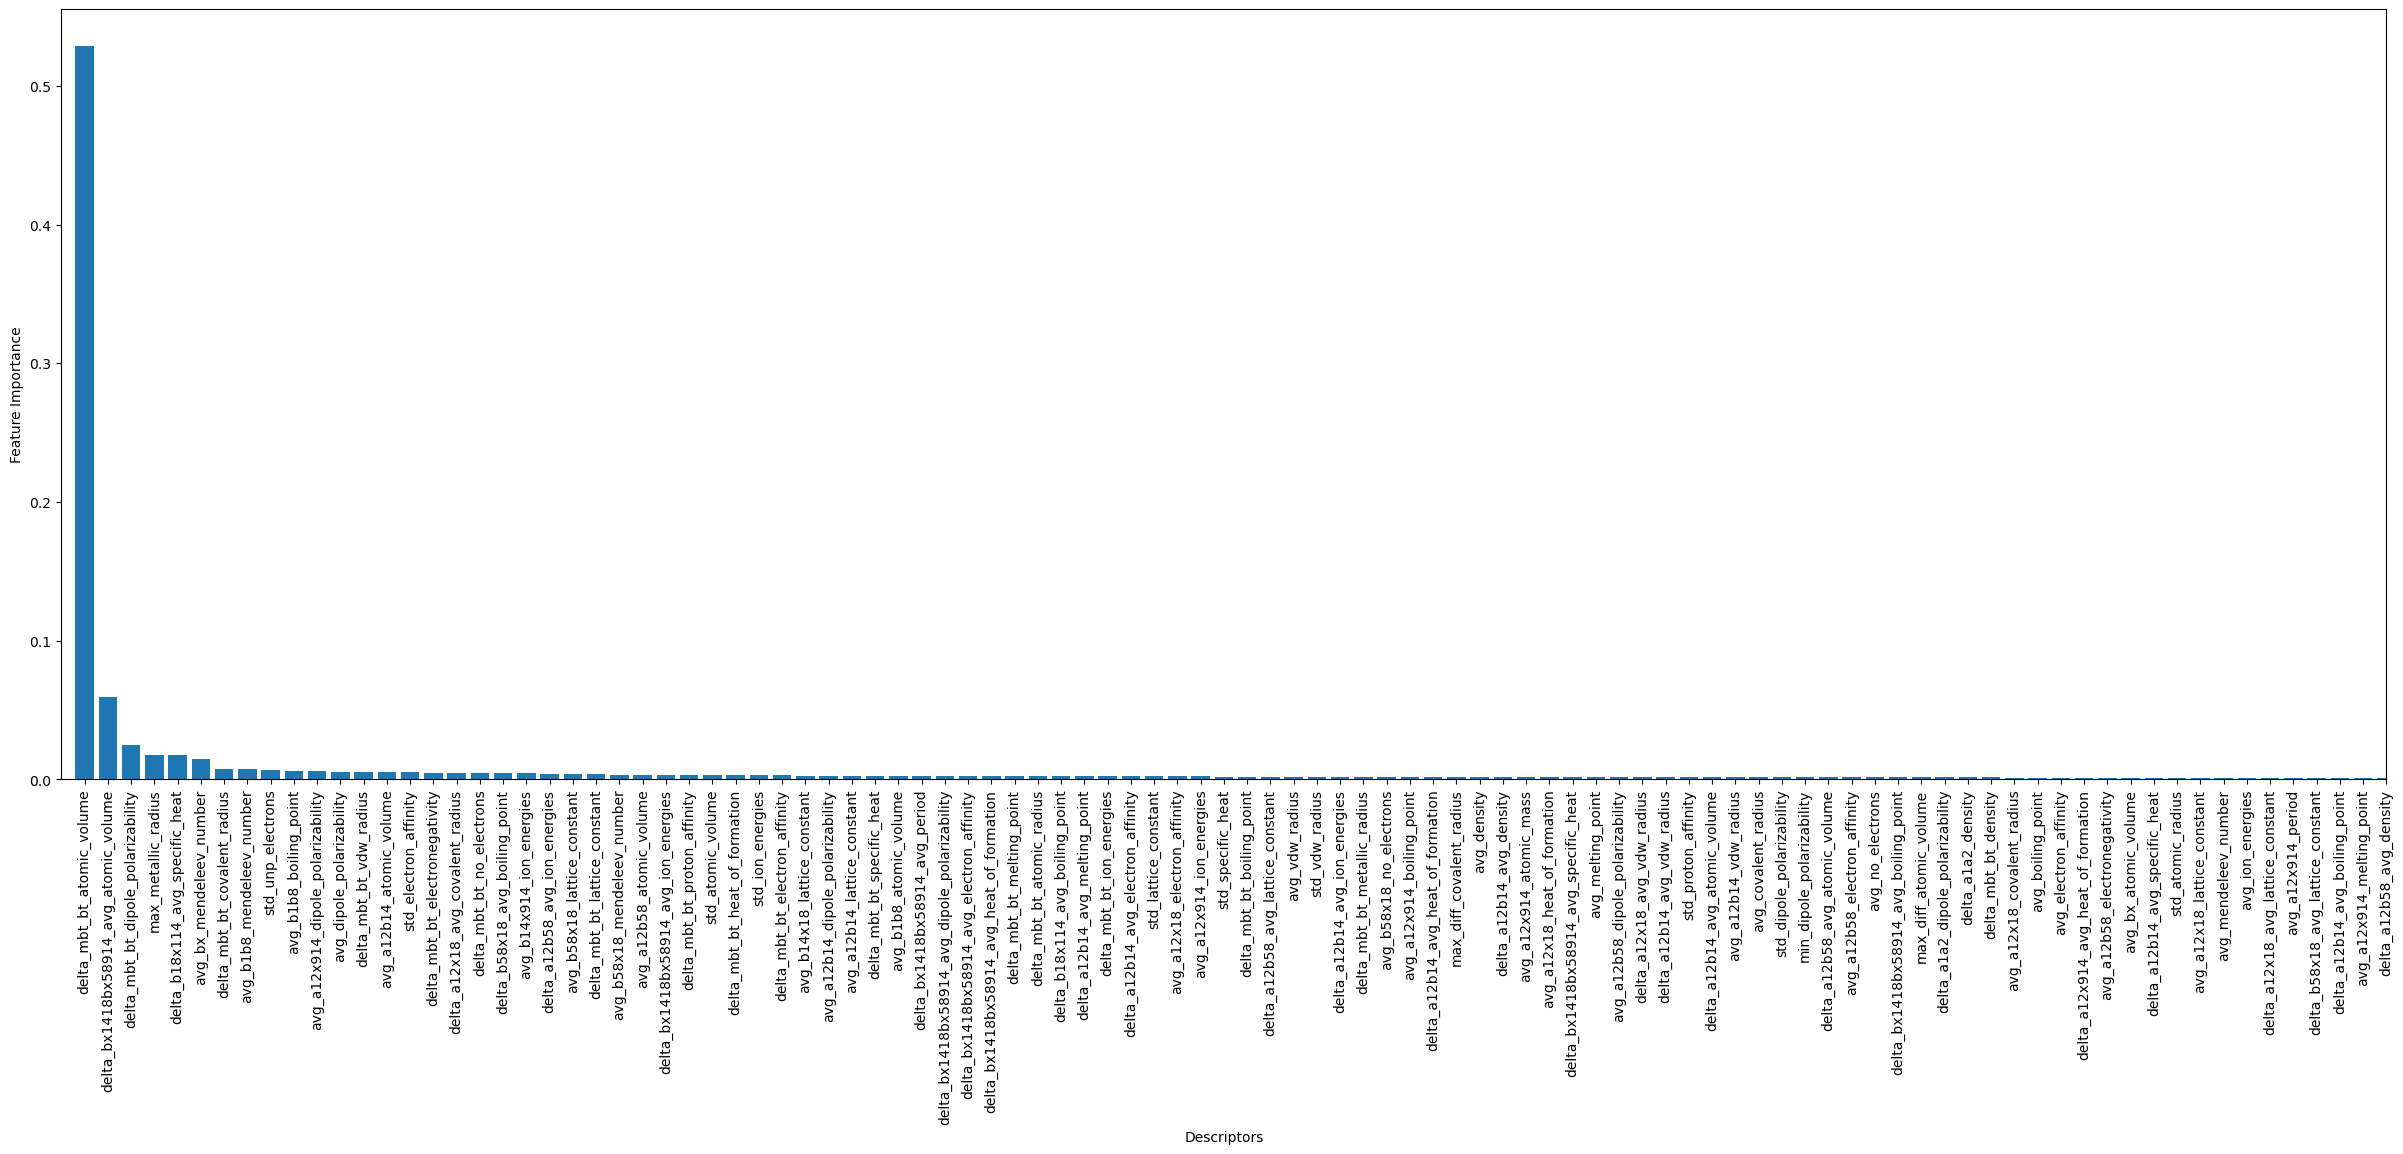

In [103]:
plt.figure(figsize=(9,9))
plt.scatter(y_train, model_rf.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train_rf:.3f}')+')',marker='o',color='green')
plt.scatter(y_test, model_rf.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test_rf:.3f}')+')',marker='s',color='red')
plt.xlabel('Actual Mismatch')
plt.ylabel('Predicted Mismatch')
plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
importances_rf = model_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
plt.bar(range(100), importances_rf[indices_rf][:100], align='center')
desc_labels = X.columns
plt.xticks(range(100), desc_labels[indices_rf][:100],  rotation=90)
plt.xlim([-1, 99])
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.show()

In [104]:
for i in range(100):
    print(i, desc_labels[indices_xgb][:100][i], importances_xgb[indices_xgb][:100][i])

0 delta_mbt_bt_atomic_volume 0.10903388
1 delta_b18x114_avg_specific_heat 0.09951182
2 avg_a12x914_dipole_polarizability 0.093521714
3 delta_bx1418bx58914_avg_atomic_volume 0.088897295
4 delta_b58x18_avg_boiling_point 0.075405866
5 delta_bx1418bx58914_avg_heat_of_formation 0.047331918
6 avg_a12b58_atomic_volume 0.041468225
7 delta_b58x18_avg_vdw_radius 0.038696308
8 delta_mbt_bt_dipole_polarizability 0.032258205
9 delta_a12x914_avg_dipole_polarizability 0.025722682
10 std_specific_heat 0.02452757
11 avg_a12b14_vdw_radius 0.023556825
12 avg_a12b14_electron_affinity 0.016919596
13 avg_a12b14_boiling_point 0.011663937
14 std_dipole_polarizability 0.01141583
15 avg_a12b58_covalent_radius 0.00927242
16 avg_electron_affinity 0.009212934
17 delta_mbt_bt_electronegativity 0.008782598
18 std_unp_electrons 0.008399697
19 max_density 0.007623034
20 delta_a12b14_avg_specific_heat 0.007126118
21 avg_a12b58_dipole_polarizability 0.0067869155
22 max_dipole_polarizability 0.006503513
23 delta_a12x18_a

In [105]:
rf_pd = pd.DataFrame({'descriptor': desc_labels[indices_rf],
                       'importance': importances_rf[indices_rf]})
rf_pd.to_csv('Results_Lattice_Mismatch/test_rf_mismatch.csv')

In [106]:
X_rf = X[desc_labels[indices_rf][:100]]

In [108]:
model_et = ExtraTreesRegressor(random_state=42)
# Train model
et_optuna = model_et.fit(X_train,y_train)

r2_train_et = r2_score(y_train, model_et.predict(X_train).flatten())
r2_test_et = r2_score(y_test, model_et.predict(X_test).flatten())

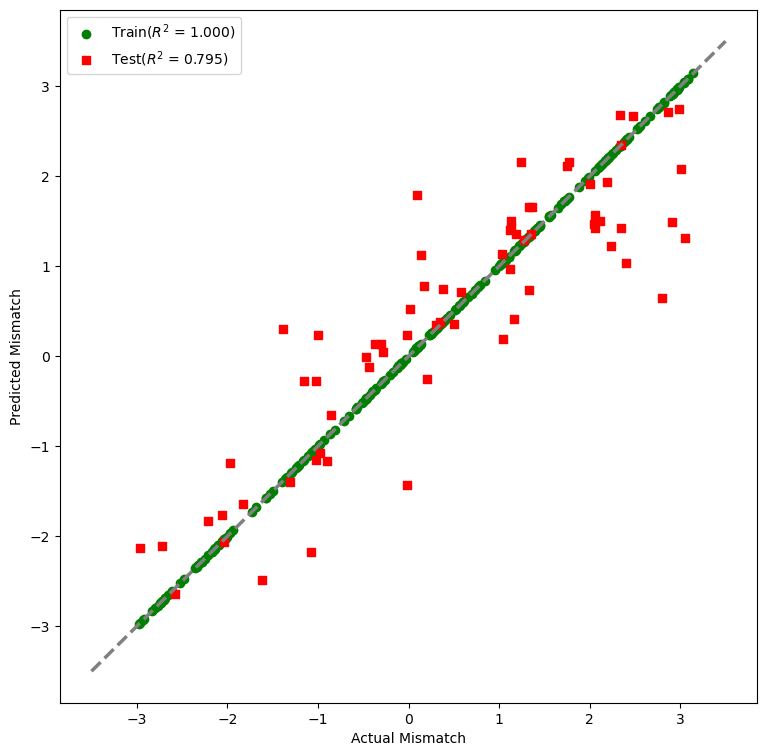

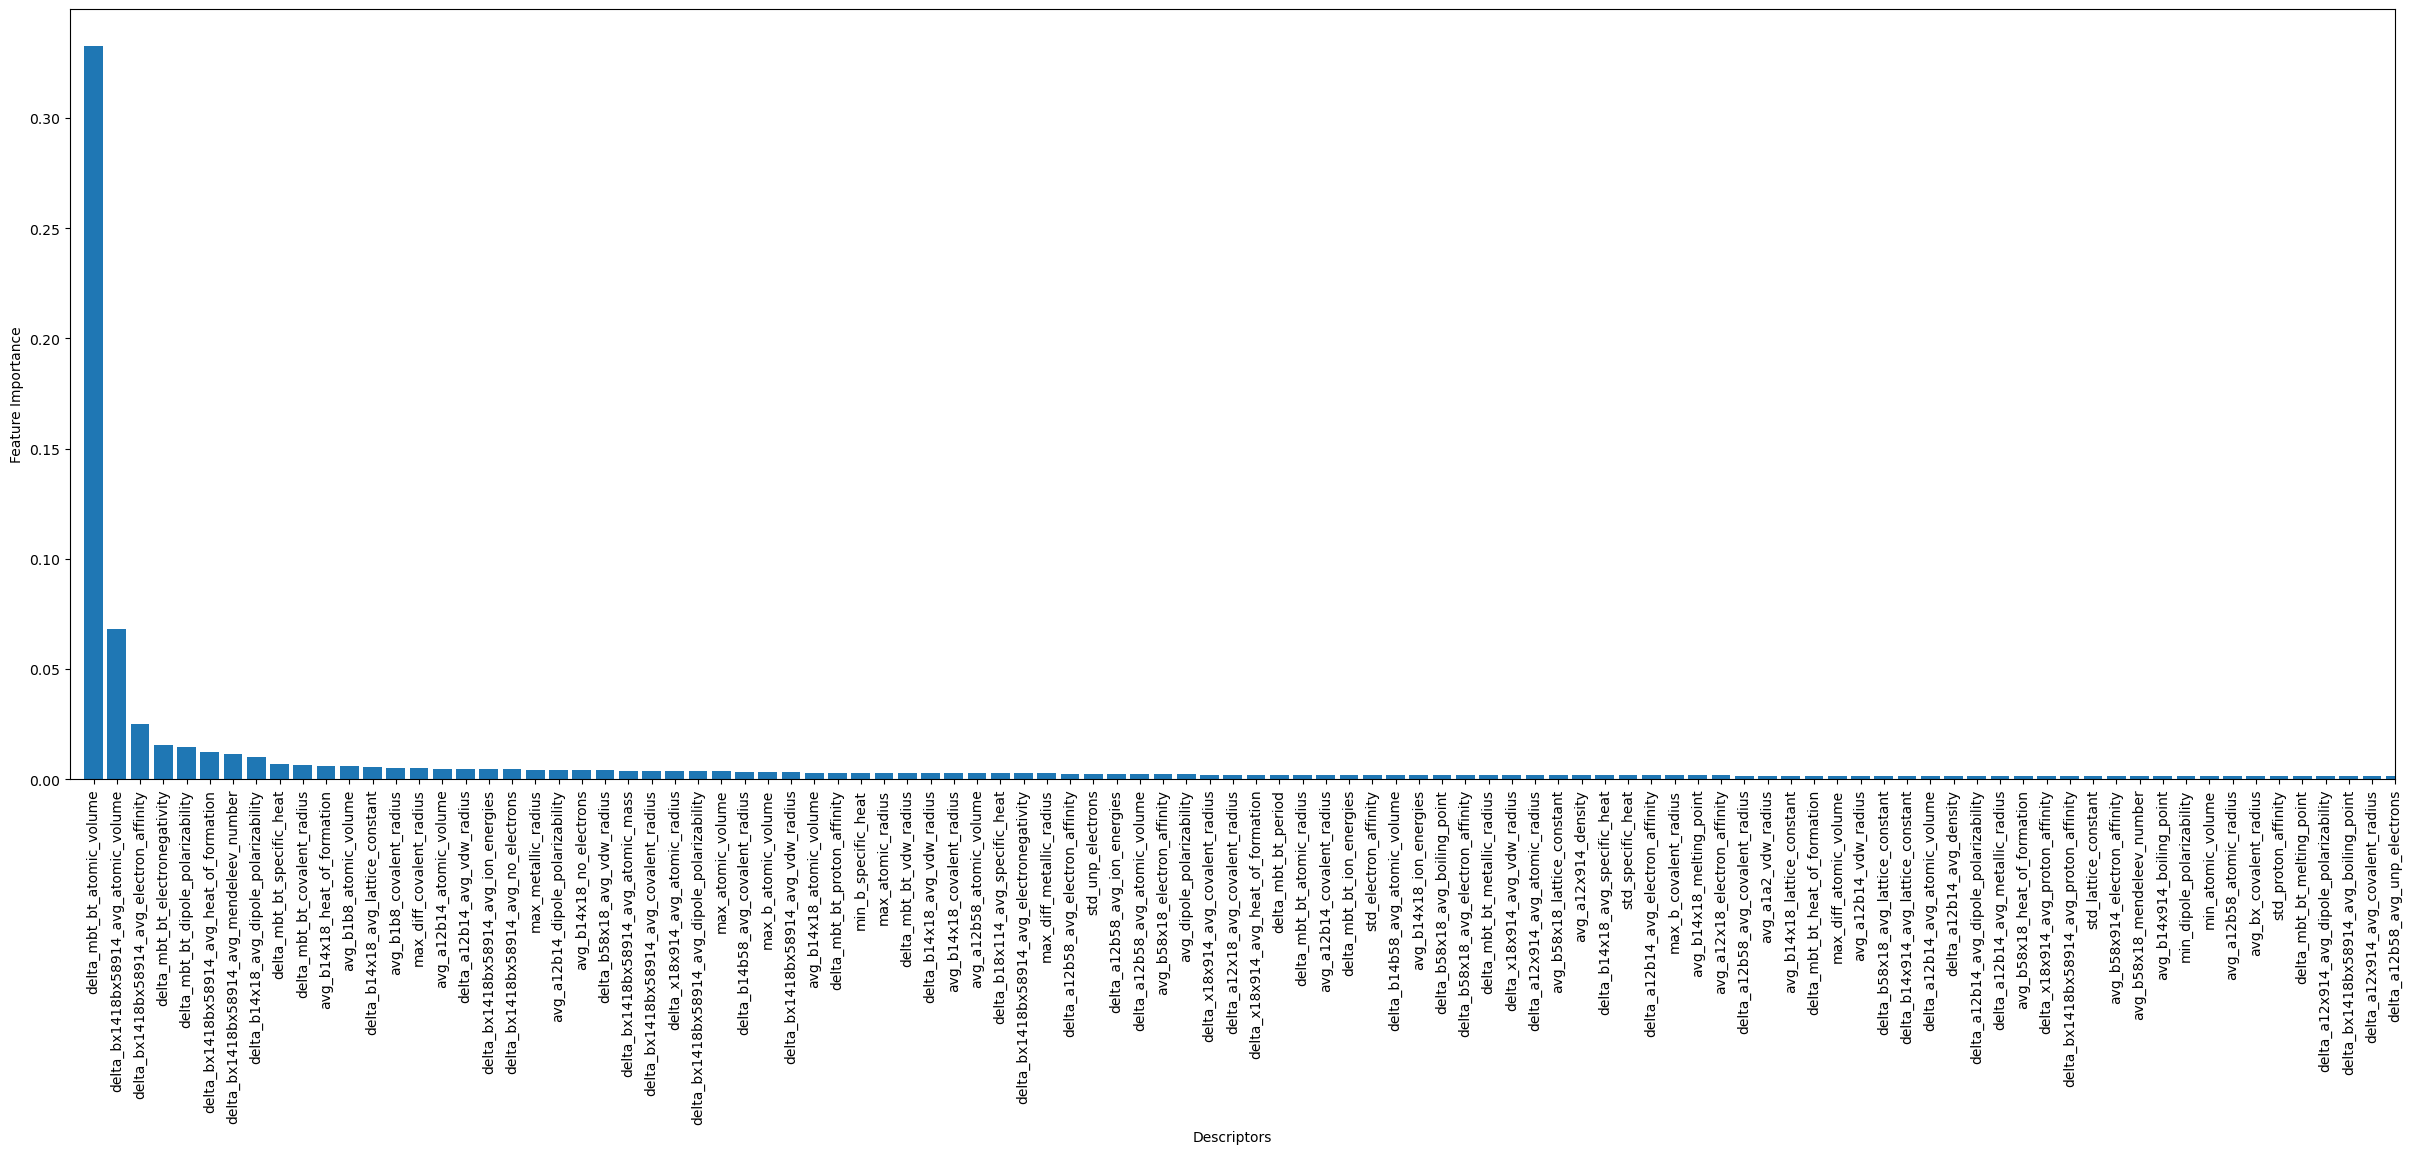

In [109]:
plt.figure(figsize=(9,9))
plt.scatter(y_train, model_et.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train_et:.3f}')+')',marker='o',color='green')
plt.scatter(y_test, model_et.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test_et:.3f}')+')',marker='s',color='red')
plt.xlabel('Actual Mismatch')
plt.ylabel('Predicted Mismatch')
plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
plt.legend()
plt.show()

plt.figure(figsize=(30,10))
importances_et = model_et.feature_importances_
indices_et = np.argsort(importances_et)[::-1]
plt.bar(range(100), importances_et[indices_et][:100], align='center')
desc_labels = X.columns
plt.xticks(range(100), desc_labels[indices_et][:100],  rotation=90)
plt.xlim([-1, 99])
plt.ylabel('Feature Importance')
plt.xlabel('Descriptors')
plt.show()

In [110]:
for i in range(100):
    print(i, desc_labels[indices_et][:100][i], importances_et[indices_et][:100][i])

0 delta_mbt_bt_atomic_volume 0.3327663869785516
1 delta_bx1418bx58914_avg_atomic_volume 0.06830684750173995
2 delta_bx1418bx58914_avg_electron_affinity 0.024983774504786064
3 delta_mbt_bt_electronegativity 0.015310376589022625
4 delta_mbt_bt_dipole_polarizability 0.014608293555505114
5 delta_bx1418bx58914_avg_heat_of_formation 0.012153018304650903
6 delta_bx1418bx58914_avg_mendeleev_number 0.011430832842314649
7 delta_b14x18_avg_dipole_polarizability 0.010086006394735407
8 delta_mbt_bt_specific_heat 0.0067068821521678555
9 delta_mbt_bt_covalent_radius 0.006279676128511911
10 avg_b14x18_heat_of_formation 0.005853325788018855
11 avg_b1b8_atomic_volume 0.005794381344928061
12 delta_b14x18_avg_lattice_constant 0.005657231311179763
13 avg_b1b8_covalent_radius 0.005245325302750182
14 max_diff_covalent_radius 0.005199995873363632
15 avg_a12b14_atomic_volume 0.004861608789324789
16 delta_a12b14_avg_vdw_radius 0.004783082651244838
17 delta_bx1418bx58914_avg_ion_energies 0.004518424815809326
18 

In [111]:
et_pd = pd.DataFrame({'descriptor': desc_labels[indices_et],
                       'importance': importances_et[indices_et]})
et_pd.to_csv('Results_Lattice_Mismatch/test_et_mismatch.csv')

In [112]:
X_et = X[desc_labels[indices_et][:100]]

In [149]:
## Using Optuna and XGB

In [188]:
import optuna
import random

#X_train,X_test,y_train,y_test = train_test_split(X_rf,y,test_size=0.20,random_state=42)
X_train_100_xgb = X_train[X_xgb.columns]
X_test_100_xgb = X_test[X_xgb.columns]

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,subsample=subsample,
                                     colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda,
                                     min_child_weight=min_child_weight,scale_pos_weight=scale_pos_weight,max_delta_step=max_delta_step,
                                     random_state=random_state)

    # Train model
    xgb_optuna = model_xgb.fit(X_train_100_xgb,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_optuna = cross_val_score(xgb_optuna,X_train_100_xgb,y_train,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_xgb_optuna = cv_scores_xgb_optuna.mean()

    # Return best F1 scores
    r2_train_xgb = r2_score(y_train, model_xgb.predict(X_train_100_xgb))
    r2_test_xgb = r2_score(y_test, model_xgb.predict(X_test_100_xgb))
#    return avg_r2_cv_xgb_optuna
    return r2_train_xgb,avg_r2_cv_xgb_optuna,r2_test_xgb

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_xgb = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=300)

[I 2025-03-14 22:17:16,938] A new study created in memory with name: no-name-784ccc15-40bc-4ca5-94ce-4f4995bc24ca
[I 2025-03-14 22:17:26,161] Trial 0 finished with values: [0.9618967448484271, 0.7108163839917818, 0.7547351865544545] and parameters: {'n_estimators': 121, 'max_depth': 47, 'learning_rate': 0.2690131901110512, 'subsample': 0.42819091236496076, 'colsample_bytree': 0.5538051353569983, 'gamma': 1.232765154142662, 'reg_alpha': 4.507301616529597e-05, 'reg_lambda': 0.10895086668672174, 'min_child_weight': 1, 'scale_pos_weight': 5, 'max_delta_step': 3.4449271739086083}.
[I 2025-03-14 22:17:29,932] Trial 1 finished with values: [0.8993102293176903, 0.715737615012366, 0.7660242169914389] and parameters: {'n_estimators': 65, 'max_depth': 15, 'learning_rate': 0.21943614538718448, 'subsample': 0.7298509502380776, 'colsample_bytree': 0.6448773988191133, 'gamma': 4.752854489955852, 'reg_alpha': 3.546390736586687e-06, 'reg_lambda': 1.3247005267273988e-07, 'min_child_weight': 2, 'scale_po

In [197]:
best_models_xgb = study_xgb.best_trials
#PRINT('Trial number',
for i in range(len(best_models_xgb)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_xgb[i].number, '\nTrain R2:',best_models_xgb[i].values[0],'\nValid R2:',best_models_xgb[i].values[1],
         '\nTest  R2:',best_models_xgb[i].values[2],'\nParams  :',best_models_xgb[i].params,'\n=======')

Model No: 0 
Trial No: 126 
Train R2: 0.9980180038896617 
Valid R2: 0.7869186864114044 
Test  R2: 0.8034196244655339 
Params  : {'n_estimators': 119, 'max_depth': 36, 'learning_rate': 0.07955864783071467, 'subsample': 0.511208537571034, 'colsample_bytree': 0.8306010545273552, 'gamma': 0.034598566662595864, 'reg_alpha': 0.008334225378074546, 'reg_lambda': 0.0023908366455413547, 'min_child_weight': 2, 'scale_pos_weight': 7, 'max_delta_step': 5.724016781032865} 
Model No: 1 
Trial No: 167 
Train R2: 0.983942463903186 
Valid R2: 0.7968641349087775 
Test  R2: 0.8495446363823328 
Params  : {'n_estimators': 134, 'max_depth': 13, 'learning_rate': 0.07586197366664167, 'subsample': 0.48540526013950236, 'colsample_bytree': 0.8752871781696028, 'gamma': 0.034598566662595864, 'reg_alpha': 0.008334225378074546, 'reg_lambda': 2.0699619450796603e-07, 'min_child_weight': 10, 'scale_pos_weight': 8, 'max_delta_step': 9.543059239125341} 
Model No: 2 
Trial No: 202 
Train R2: 0.9834557805452323 
Valid R2: 0

In [190]:
best_models_xgb_pd = pd.DataFrame({'Trial number': [best_models_xgb[i].number for i in range(len(best_models_xgb))],
                                             'Train R2': [best_models_xgb[i].values[0] for i in range(len(best_models_xgb))],
                                             'Test R2': [best_models_xgb[i].values[2] for i in range(len(best_models_xgb))],
                                             'CV R2': [best_models_xgb[i].values[1] for i in range(len(best_models_xgb))],
                                             'n_estimators': [best_models_xgb[i].params['n_estimators'] for i in range(len(best_models_xgb))],
                                             'max_depth': [best_models_xgb[i].params['max_depth'] for i in range(len(best_models_xgb))],
                                             'learning_rate': [best_models_xgb[i].params['learning_rate'] for i in range(len(best_models_xgb))],
                                             'subsample': [best_models_xgb[i].params['subsample'] for i in range(len(best_models_xgb))],
                                             'colsample_bytree': [best_models_xgb[i].params['colsample_bytree'] for i in range(len(best_models_xgb))],
                                             'gamma': [best_models_xgb[i].params['gamma'] for i in range(len(best_models_xgb))],
                                             'reg_alpha': [best_models_xgb[i].params['reg_alpha'] for i in range(len(best_models_xgb))],
                                             'reg_lambda': [best_models_xgb[i].params['reg_lambda'] for i in range(len(best_models_xgb))],
                                             'min_child_weight': [best_models_xgb[i].params['min_child_weight'] for i in range(len(best_models_xgb))],
                                             'scale_pos_weight': [best_models_xgb[i].params['scale_pos_weight'] for i in range(len(best_models_xgb))],
                                             'max_delta_step': [best_models_xgb[i].params['max_delta_step'] for i in range(len(best_models_xgb))]
                                            })
best_models_xgb_pd.to_excel('Results_Lattice_Mismatch/NEW_100_XGBRegressor_X_HP_Optuna.xlsx')

In [219]:
import optuna
import random

def detailed_objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models_xgb[17].params['n_estimators'],
                                    max_depth=best_models_xgb[17].params['max_depth'],
                                    learning_rate=best_models_xgb[17].params['learning_rate'],
                                    subsample=best_models_xgb[17].params['subsample'],
                                    colsample_bytree=best_models_xgb[17].params['colsample_bytree'],
                                    gamma=best_models_xgb[17].params['gamma'],
                                    reg_alpha=best_models_xgb[17].params['reg_alpha'],
                                    reg_lambda=best_models_xgb[17].params['reg_lambda'],
                                    min_child_weight=best_models_xgb[17].params['min_child_weight'],
                                    scale_pos_weight=best_models_xgb[17].params['scale_pos_weight'],
                                    max_delta_step=best_models_xgb[17].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_optuna = model_xgb.fit(X_train_100_xgb,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_optuna = cross_val_score(xgb_optuna,X_train_100_xgb,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_xgb_optuna = cv_scores_xgb_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_xgb = r2_score(y_train, model_xgb.predict(X_train_100_xgb))
    r2_test_xgb = r2_score(y_test, model_xgb.predict(X_test_100_xgb))

    mae_train_xgb = mean_absolute_error(y_train, model_xgb.predict(X_train_100_xgb))
    mae_test_xgb = mean_absolute_error(y_test, model_xgb.predict(X_test_100_xgb))
    
    print('R2 scores (train, CV, test) = ', r2_train_xgb,avg_r2_cv_xgb_optuna,r2_test_xgb)
    print('MAE values (train, test) = ', mae_train_xgb,mae_test_xgb)

    ## Exporting the results
    y_pred_train = model_xgb.predict(X_train_100_xgb)
    y_pred_test = model_xgb.predict(X_test_100_xgb)   

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train, model_xgb.predict(X_train_100_xgb).flatten(),label='Train($R^2$ = '+str(f'{r2_train_xgb:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_test, model_xgb.predict(X_test_100_xgb).flatten(),label='Test($R^2$ = '+str(f'{r2_test_xgb:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Actual Mismatch')
    ax1.set_ylabel('Predicted Mismatch')
    ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()

    importances_xgb = model_xgb.feature_importances_
    indices_xgb = np.argsort(importances_xgb)[::-1]    
    ax2.bar(range(12), importances_xgb[indices_xgb][:12], align='center')
    desc_labels_100 = X_train_100_xgb.columns
    ax2.set_xticks(range(12), desc_labels_100[indices_xgb][:12],  rotation=90)
    ax2.set_xlim([-0.5, 11.5])
    ax2.set_ylabel('Feature Importance')
    ax2.set_xlabel('Descriptors')
    plt.show()

In [220]:
# 1,2,5,6,7,8,13,14,15,16,17

R2 scores (train, CV, test) =  0.9714414566683836 0.8036789473232415 0.8316147571201455
MAE values (train, test) =  0.1852631481033478 0.48796554692825783


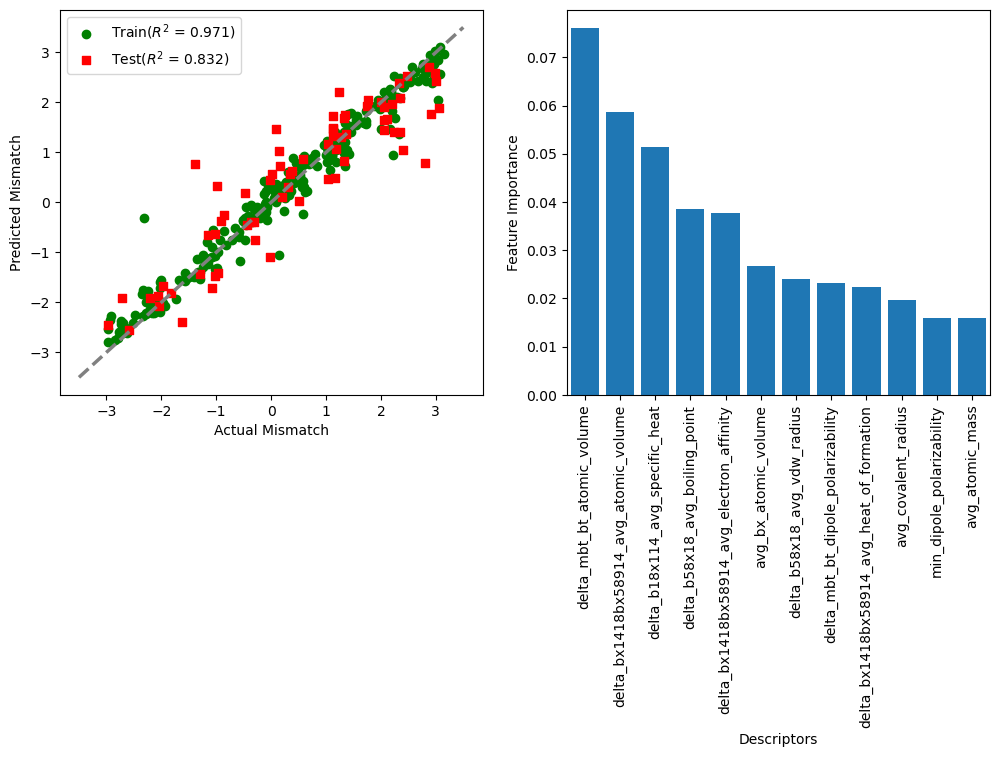

In [221]:
detailed_objective_xgb(study_xgb.best_trials[17])

R2 scores (train, CV, test) =  0.9966324535081916 0.7985430770706337 0.8295109715671889
MAE values (train, test) =  0.06573462162601336 0.5027275832122734


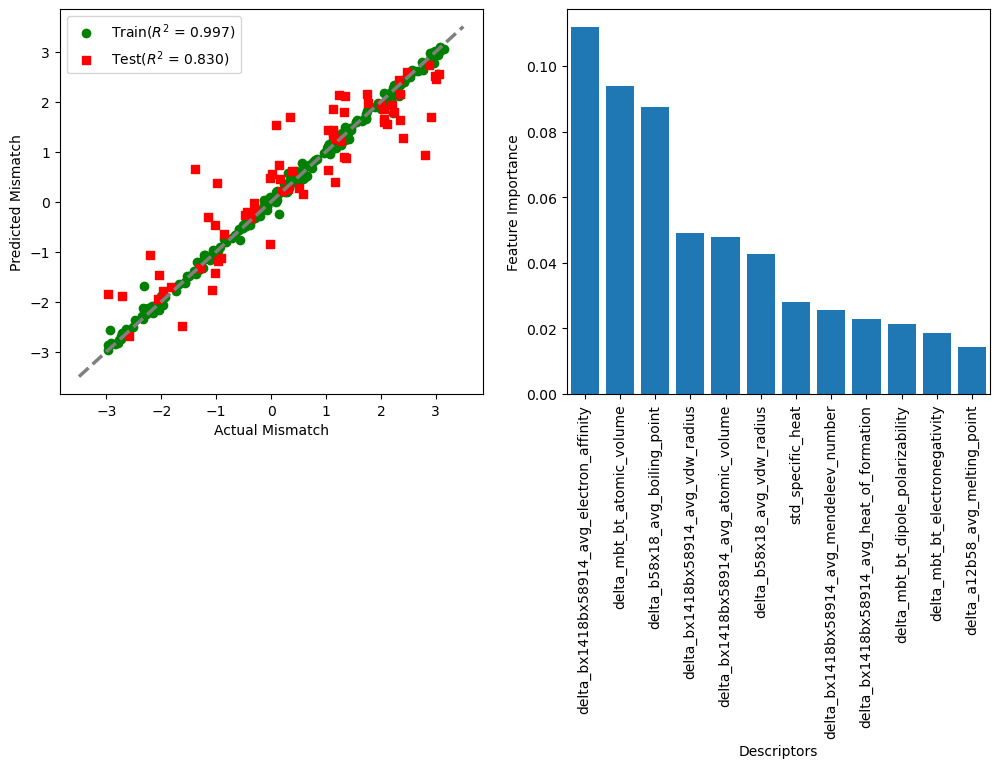

In [218]:
detailed_objective_xgb(study_xgb.best_trials[16])

R2 scores (train, CV, test) =  0.9764915637703765 0.7995630384681736 0.8385447021294264
MAE values (train, test) =  0.17264697062766607 0.4919207007676598


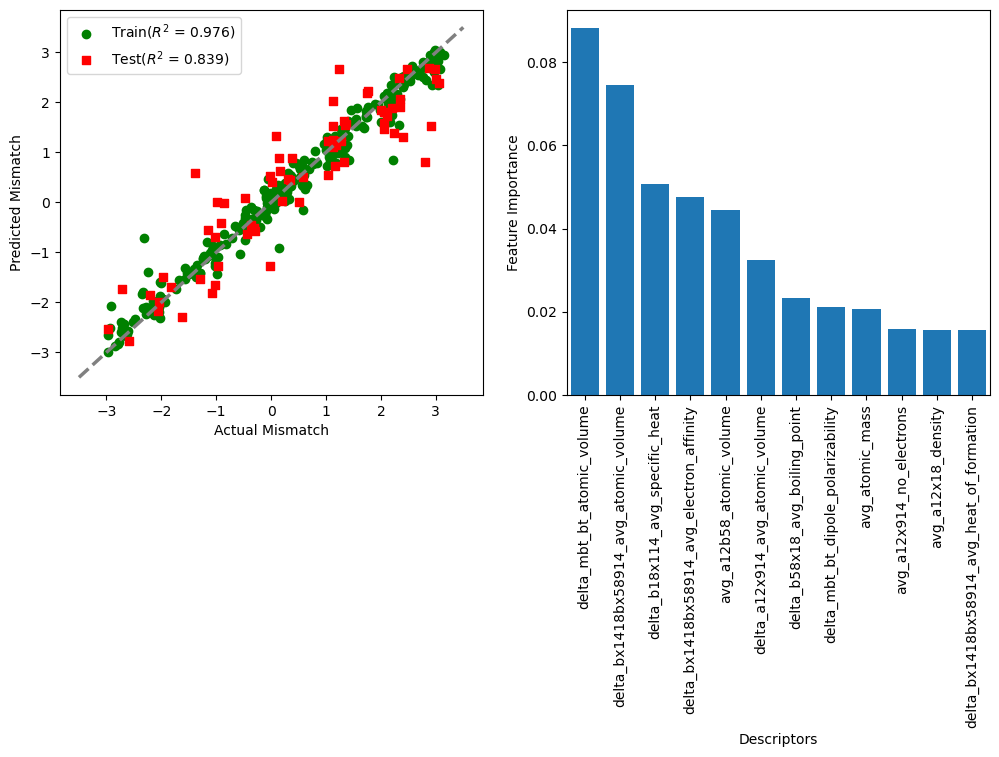

In [216]:
detailed_objective_xgb(study_xgb.best_trials[15])

R2 scores (train, CV, test) =  0.9854377480335756 0.7956901620022074 0.8530810697341866
MAE values (train, test) =  0.12152690547234467 0.43078195149479126


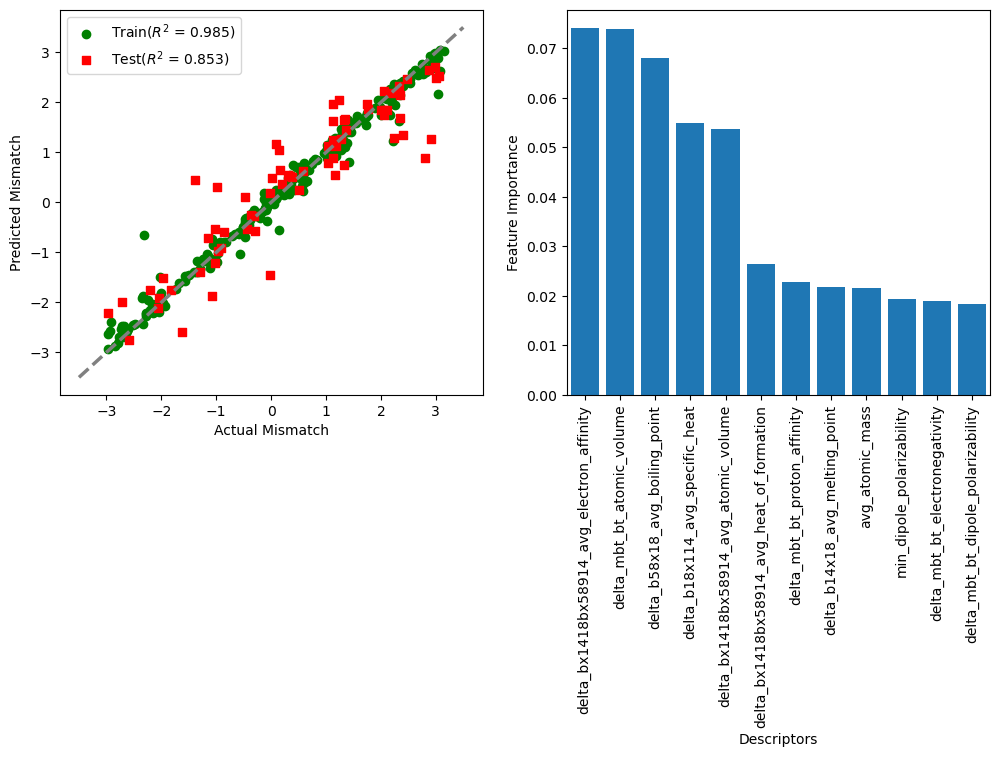

In [214]:
detailed_objective_xgb(study_xgb.best_trials[14])

R2 scores (train, CV, test) =  0.9930507695589352 0.7851894915026267 0.835990759041713
MAE values (train, test) =  0.10681858678146845 0.5095327068239279


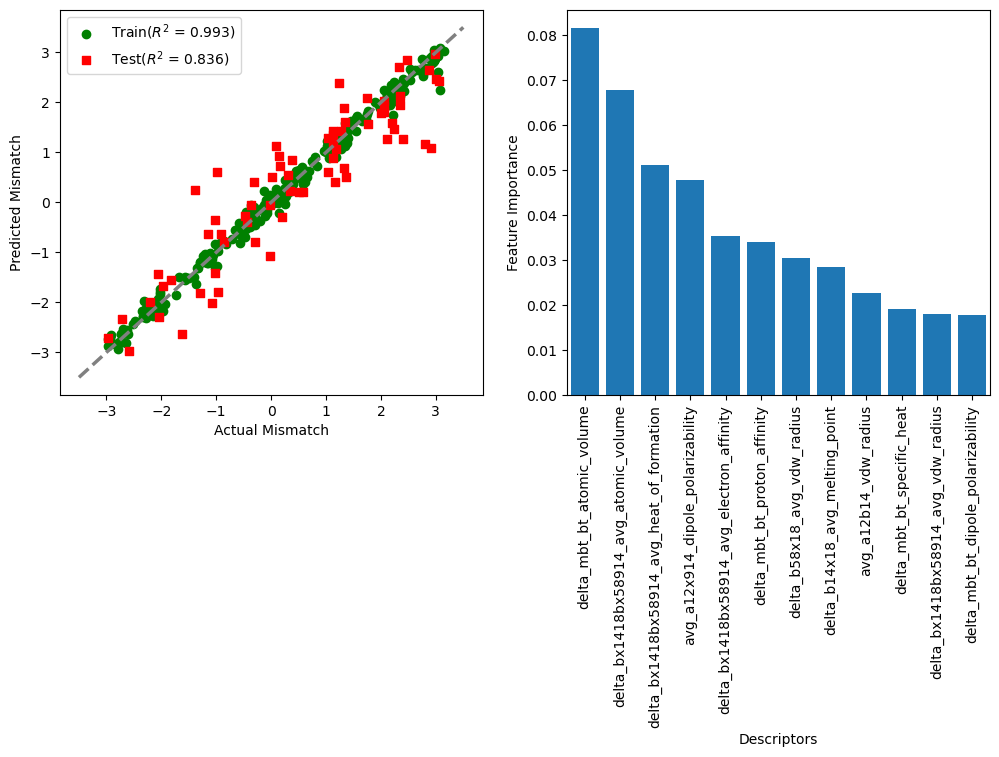

In [210]:
detailed_objective_xgb(study_xgb.best_trials[13])

R2 scores (train, CV, test) =  0.9966962567040035 0.7846896160737391 0.8284209159248959
MAE values (train, test) =  0.06283794428683655 0.4892663845474122


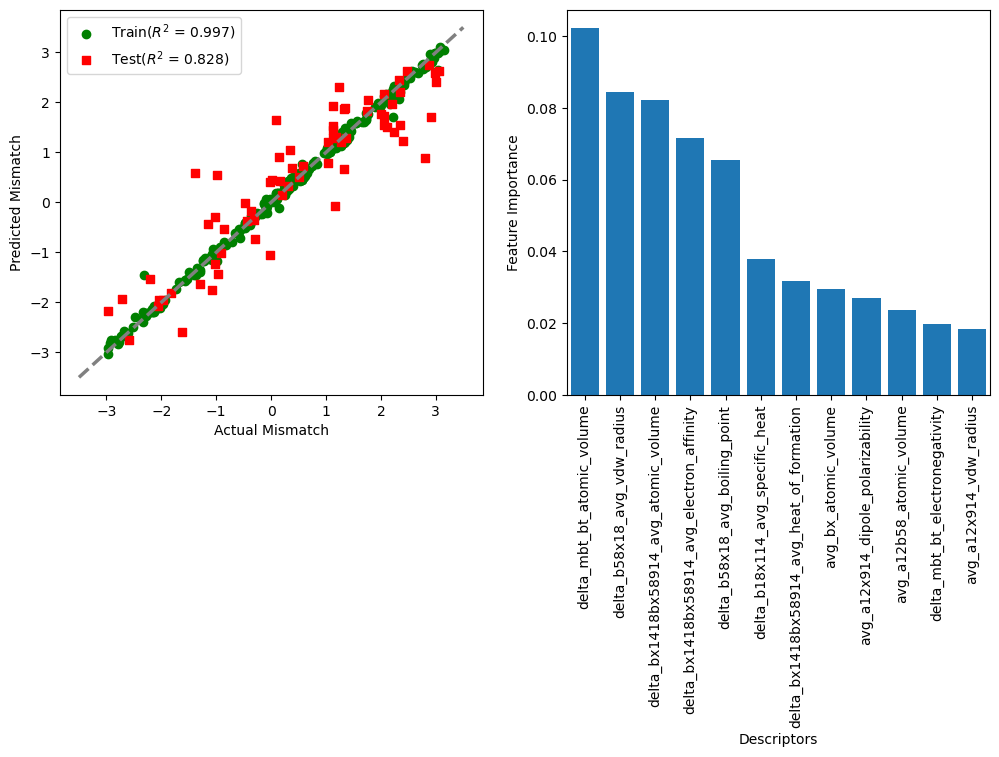

In [208]:
detailed_objective_xgb(study_xgb.best_trials[8])

R2 scores (train, CV, test) =  0.990872412366859 0.7997898698241801 0.8297296775072702
MAE values (train, test) =  0.10447519868770937 0.4708330418631782


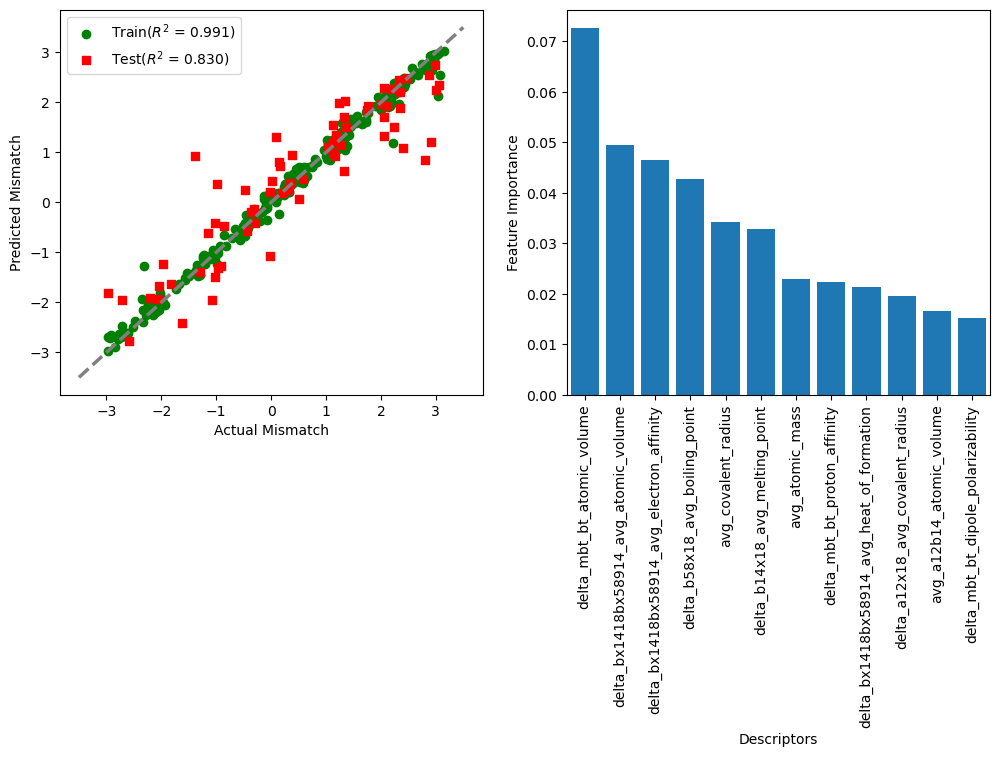

In [206]:
detailed_objective_xgb(study_xgb.best_trials[7])

R2 scores (train, CV, test) =  0.9764915637703765 0.7995630384681736 0.8385447021294264
MAE values (train, test) =  0.17264697062766607 0.4919207007676598


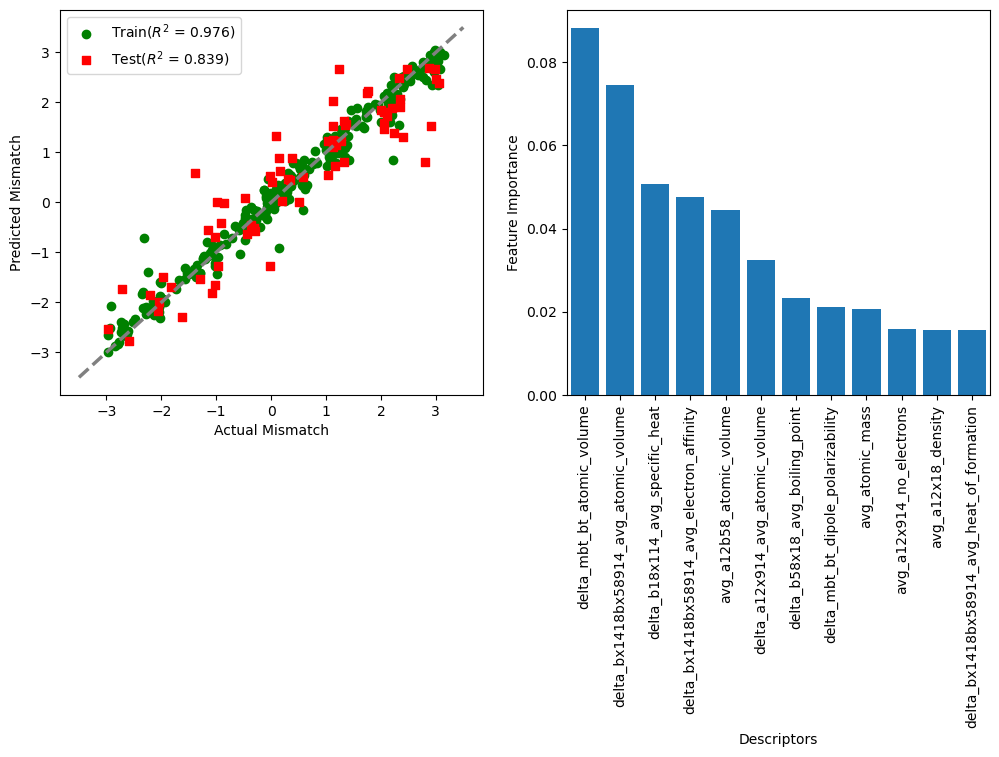

In [204]:
detailed_objective_xgb(study_xgb.best_trials[6])

R2 scores (train, CV, test) =  0.9557280819651982 0.8030515720513858 0.8345544059948397
MAE values (train, test) =  0.26750784127829835 0.512982692261915


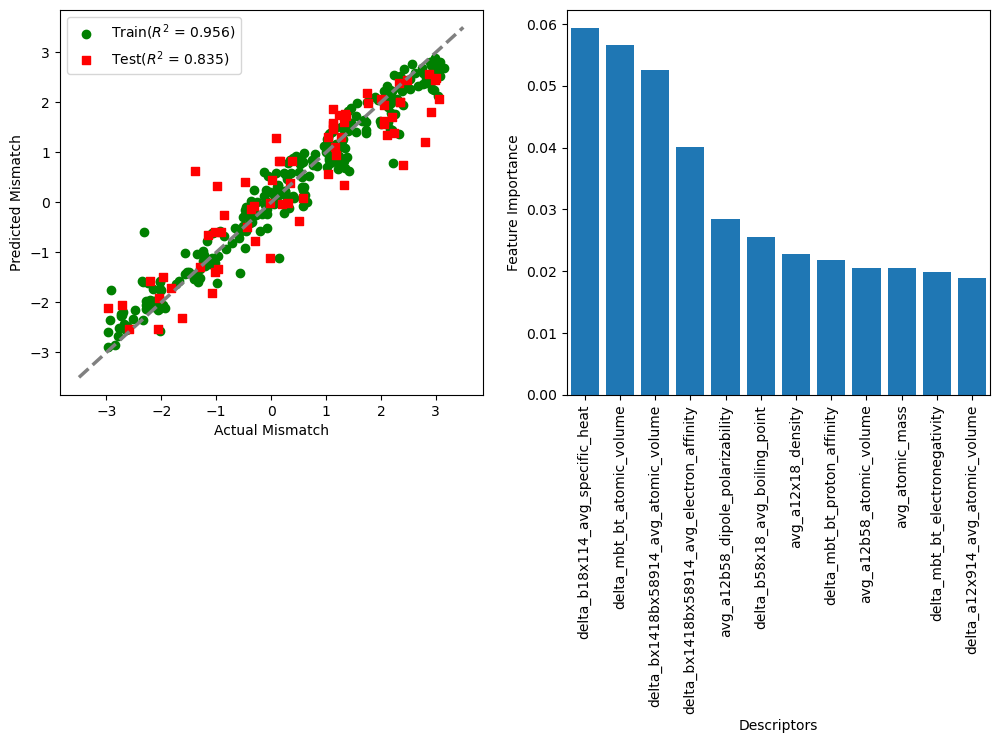

In [202]:
detailed_objective_xgb(study_xgb.best_trials[5])

R2 scores (train, CV, test) =  0.9834557805452323 0.8031782716140855 0.8129931767086103
MAE values (train, test) =  0.13750704837854788 0.5134098066727081


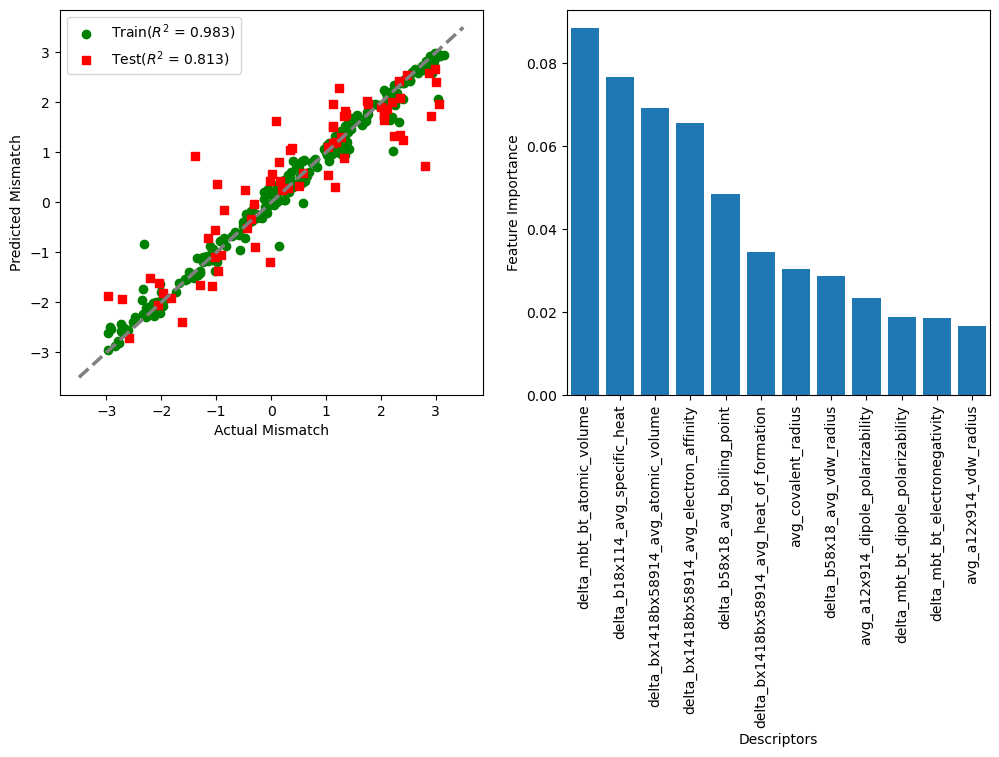

In [199]:
detailed_objective_xgb(study_xgb.best_trials[2])

R2 scores (train, CV, test) =  0.983942463903186 0.7968641349087775 0.8495446363823328
MAE values (train, test) =  0.13584350241786647 0.4852064314067847


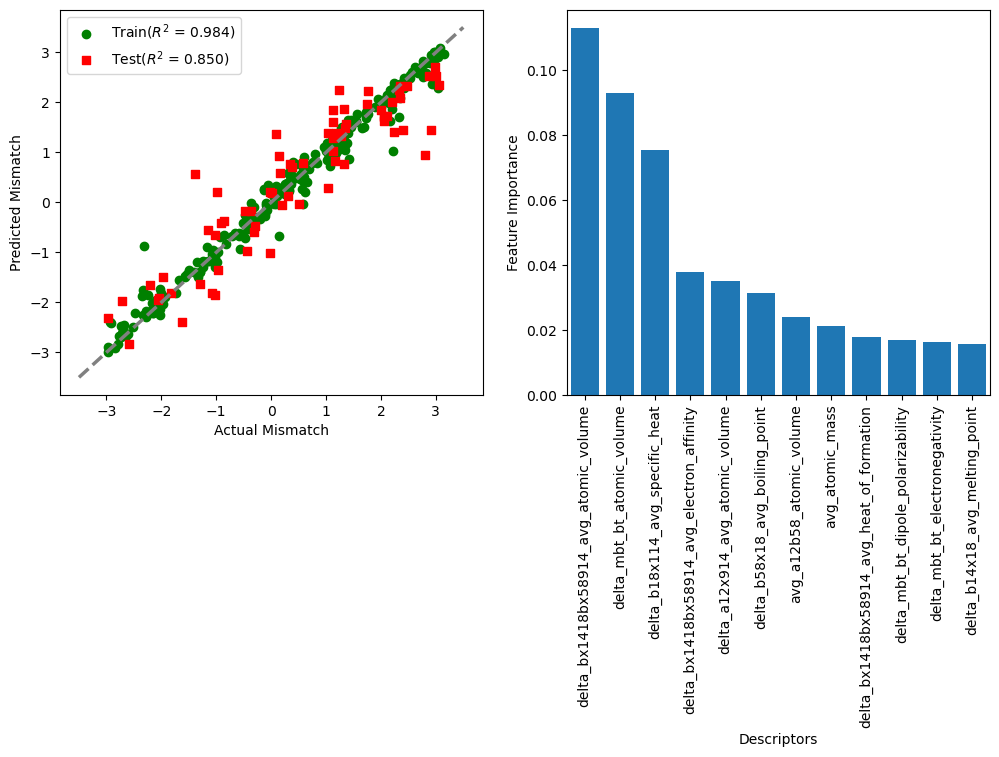

In [196]:
detailed_objective_xgb(study_xgb.best_trials[1])

In [222]:
## best model is trial 1

R2 scores (train, CV, test) =  0.983942463903186 0.7968641349087775 0.8495446363823328
MAE values (train, test) =  0.13584350241786647 0.4852064314067847


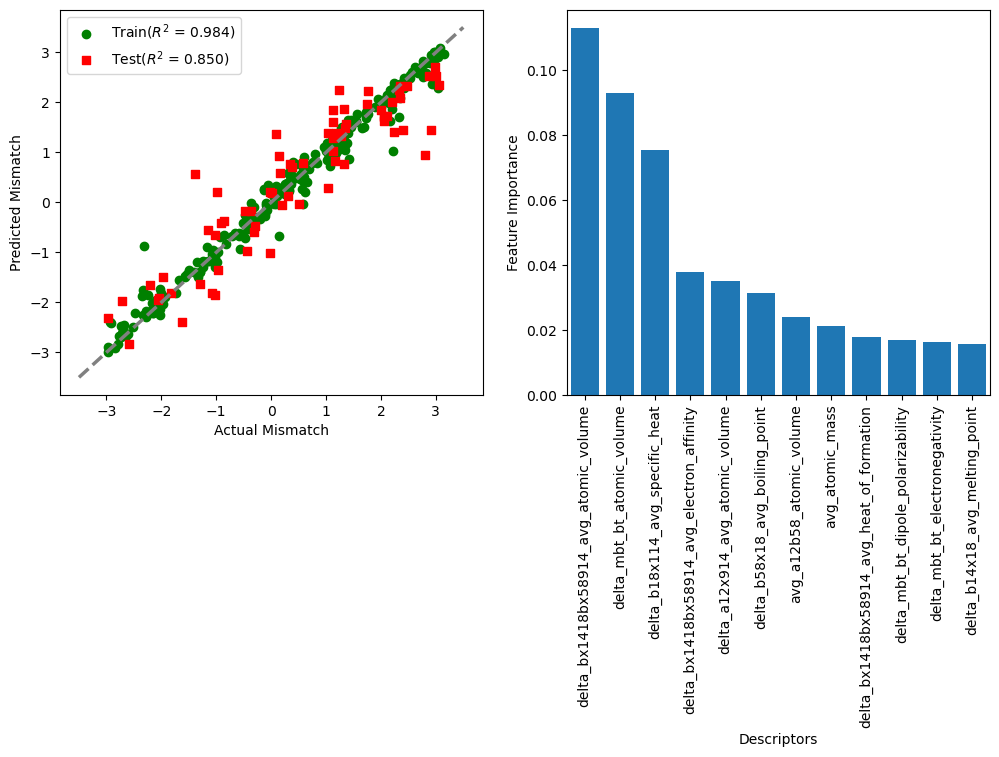

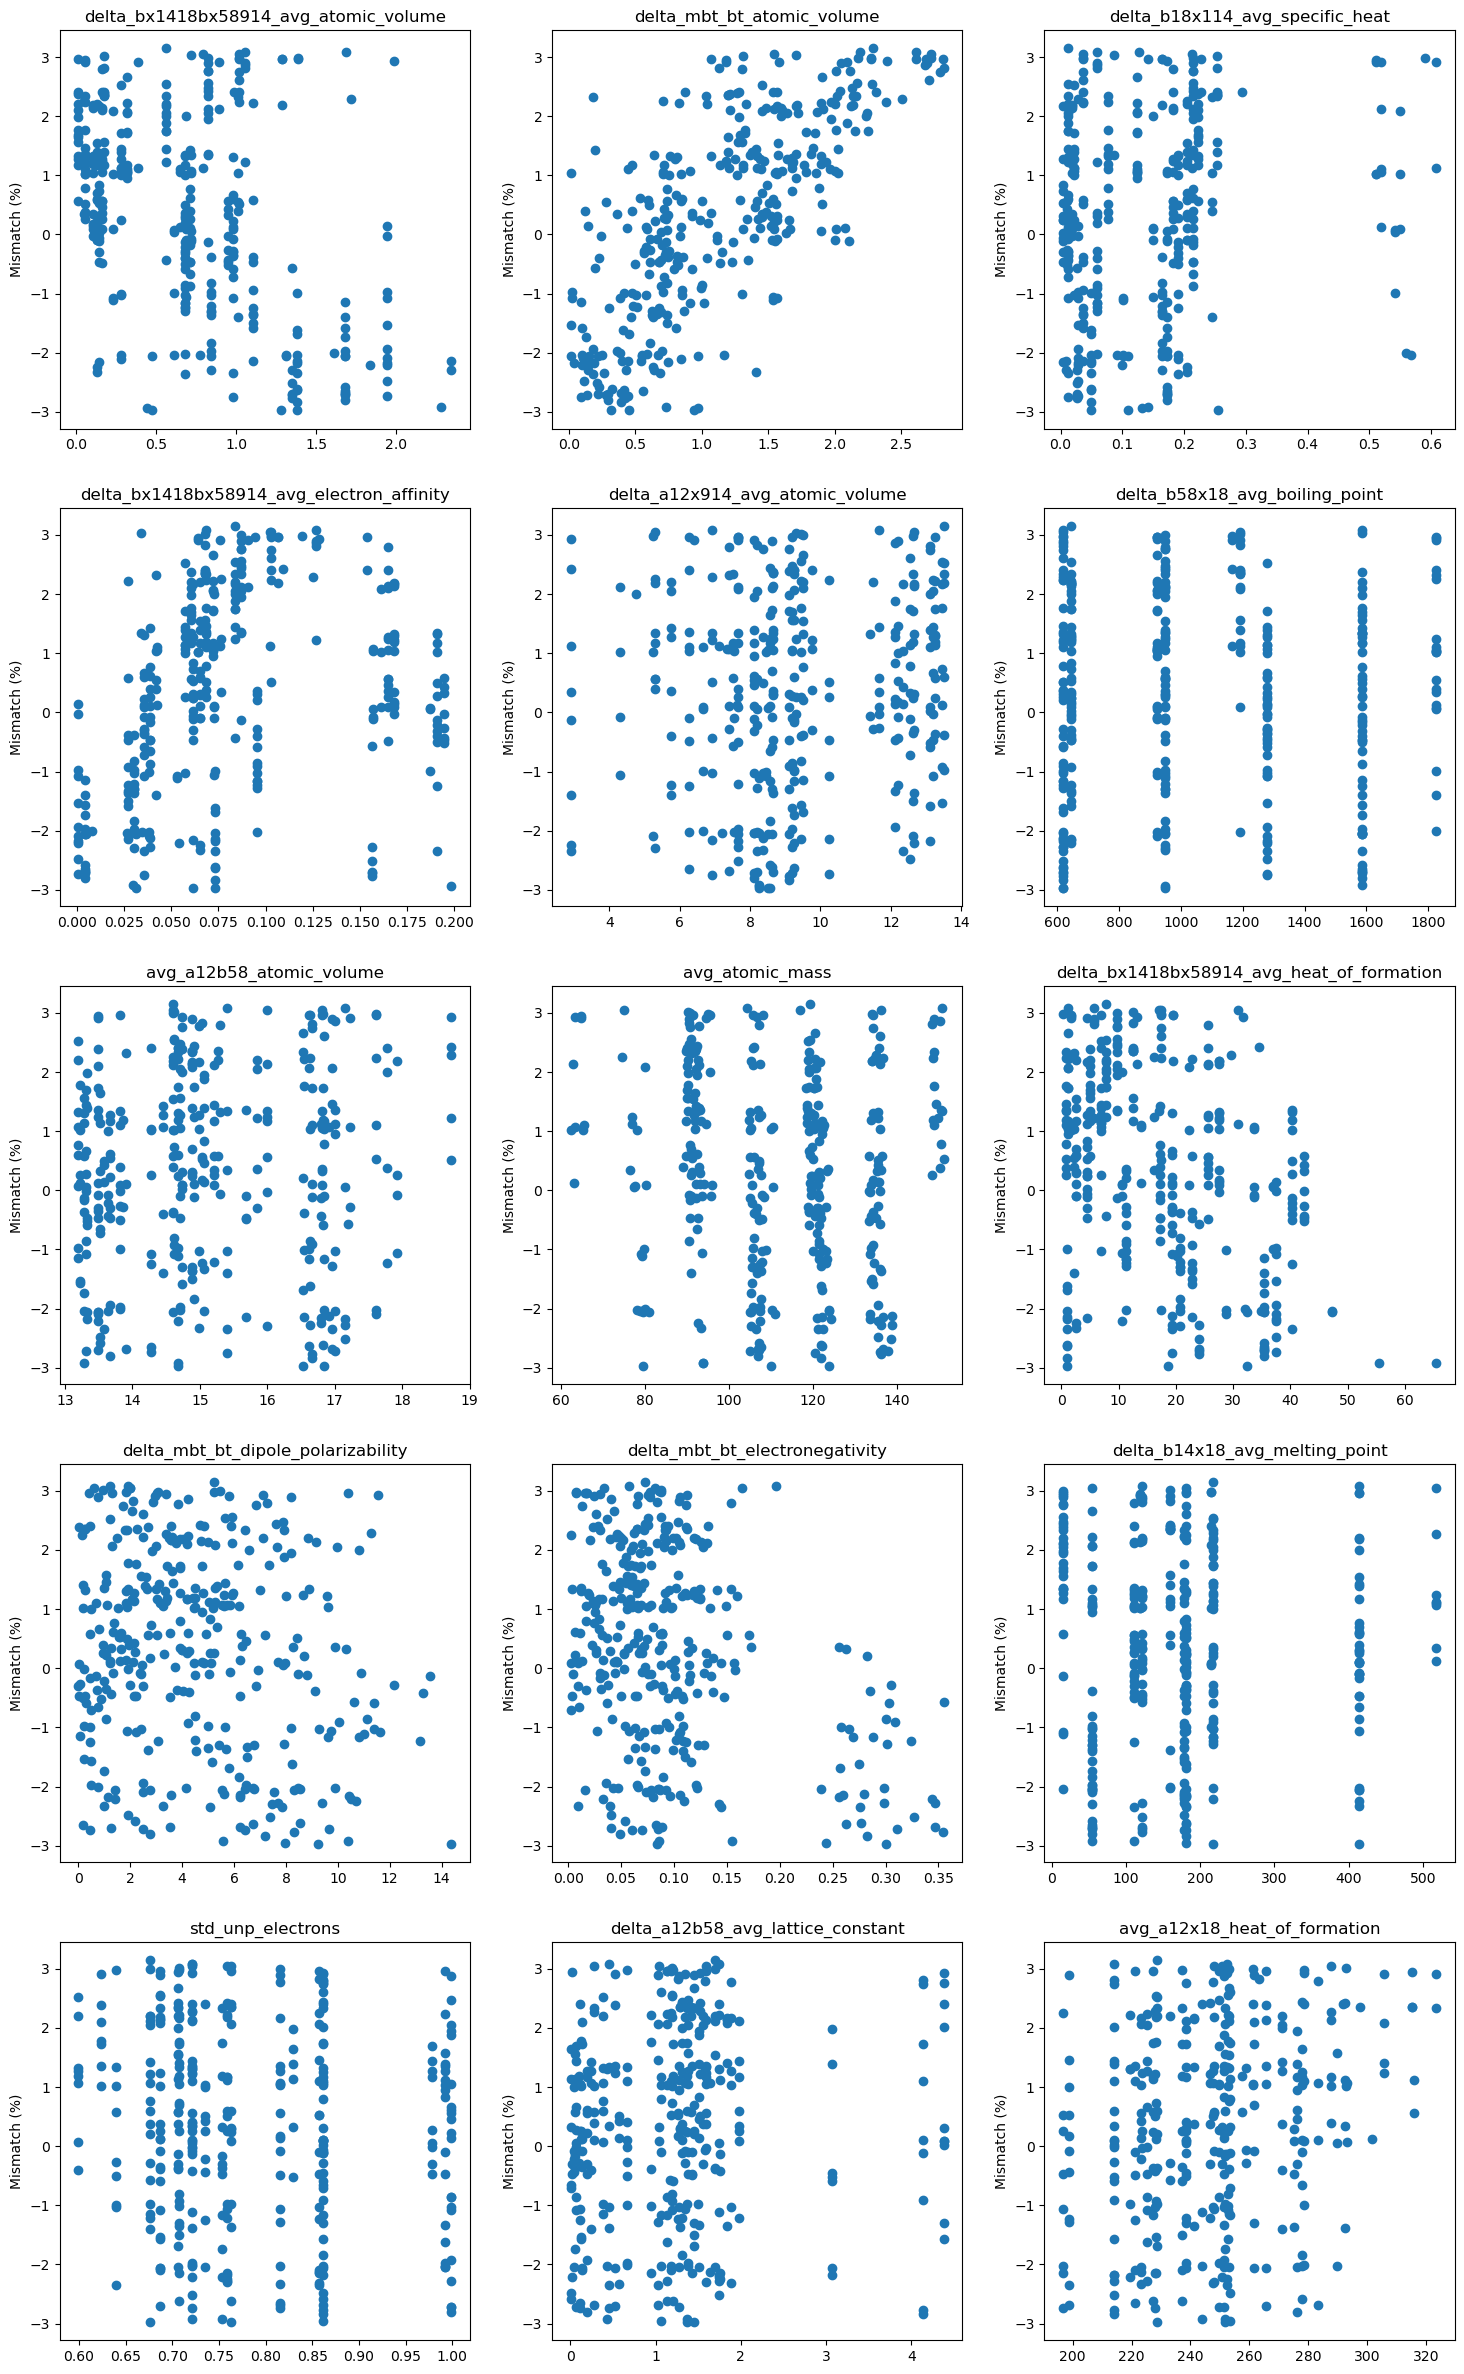

In [223]:
import optuna
import random

def detailed_objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators',10,150)
    max_depth = trial.suggest_int('max_depth',5,50)
    learning_rate = trial.suggest_float('learning_rate', 0.05, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    gamma = trial.suggest_float('gamma', 0, 10)
    reg_alpha = trial.suggest_float('reg_alpha', 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float('reg_lambda', 1e-8, 10, log=True)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 10)
    max_delta_step = trial.suggest_float('max_delta_step', 0, 10)
    random_state = 42

    model_xgb = xgb.XGBRegressor(n_estimators=best_models_xgb[1].params['n_estimators'],
                                    max_depth=best_models_xgb[1].params['max_depth'],
                                    learning_rate=best_models_xgb[1].params['learning_rate'],
                                    subsample=best_models_xgb[1].params['subsample'],
                                    colsample_bytree=best_models_xgb[1].params['colsample_bytree'],
                                    gamma=best_models_xgb[1].params['gamma'],
                                    reg_alpha=best_models_xgb[1].params['reg_alpha'],
                                    reg_lambda=best_models_xgb[1].params['reg_lambda'],
                                    min_child_weight=best_models_xgb[1].params['min_child_weight'],
                                    scale_pos_weight=best_models_xgb[1].params['scale_pos_weight'],
                                    max_delta_step=best_models_xgb[1].params['max_delta_step'],
                                    random_state=random_state)

    # Train model
    xgb_optuna = model_xgb.fit(X_train_100_xgb,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_xgb_optuna = cross_val_score(xgb_optuna,X_train_100_xgb,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_xgb_optuna = cv_scores_xgb_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_xgb = r2_score(y_train, model_xgb.predict(X_train_100_xgb))
    r2_test_xgb = r2_score(y_test, model_xgb.predict(X_test_100_xgb))

    mae_train_xgb = mean_absolute_error(y_train, model_xgb.predict(X_train_100_xgb))
    mae_test_xgb = mean_absolute_error(y_test, model_xgb.predict(X_test_100_xgb))
    
    print('R2 scores (train, CV, test) = ', r2_train_xgb,avg_r2_cv_xgb_optuna,r2_test_xgb)
    print('MAE values (train, test) = ', mae_train_xgb,mae_test_xgb)

    ## Exporting the results
    y_pred_train = model_xgb.predict(X_train_100_xgb)
    y_pred_test = model_xgb.predict(X_test_100_xgb)

    X_train_100.to_excel('Results_Lattice_Mismatch/100_X_train_Optuna.xlsx',index=False)
    X_test_100.to_excel('Results_Lattice_Mismatch/100_X_test_Optuna.xlsx',index=False)      
    
    y_train.to_excel('Results_Lattice_Mismatch/100_y_train_Optuna.xlsx',index=False)
    y_test.to_excel('Results_Lattice_Mismatch/100_y_test_Optuna.xlsx',index=False)      
    
    pd.DataFrame(y_pred_train).to_excel('Results_Lattice_Mismatch/100_y_pred_train_Optuna_1.xlsx',index=False)
    pd.DataFrame(y_pred_test).to_excel('Results_Lattice_Mismatch/100_y_pred_test_Optuna_1.xlsx',index=False)    

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train, model_xgb.predict(X_train_100_xgb).flatten(),label='Train($R^2$ = '+str(f'{r2_train_xgb:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_test, model_xgb.predict(X_test_100_xgb).flatten(),label='Test($R^2$ = '+str(f'{r2_test_xgb:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Actual Mismatch')
    ax1.set_ylabel('Predicted Mismatch')
    ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()

    importances_xgb = model_xgb.feature_importances_
    indices_xgb = np.argsort(importances_xgb)[::-1]    
    ax2.bar(range(12), importances_xgb[indices_xgb][:12], align='center')
    desc_labels_100 = X_train_100_xgb.columns
    ax2.set_xticks(range(12), desc_labels_100[indices_xgb][:12],  rotation=90)
    ax2.set_xlim([-0.5, 11.5])
    ax2.set_ylabel('Feature Importance')
    ax2.set_xlabel('Descriptors')
    plt.show()

    fig,ax = plt.subplots(nrows = 5, ncols = 3,figsize = (18,30))
    nrows = 5
    ncols = 3
    count = 0
    for i in range(nrows):
        for j in range(ncols):
            
            ax[i,j].scatter(df_347[desc_labels_100[indices_xgb][count]],df_347['MBT_mismatch'])
            ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Mismatch (%)'), ax[i,j].set_title(desc_labels_100[indices_xgb][count])
            
            count = count+1
    
    plt.show()

detailed_objective_xgb(study_xgb.best_trials[1])

In [150]:
## Using Optuna and RF

In [224]:
import optuna
import random

#X_train,X_test,y_train,y_test = train_test_split(X_rf,y,test_size=0.20,random_state=42)
X_train_100_rf = X_train[X_rf.columns]
X_test_100_rf = X_test[X_rf.columns]

def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)
    
    # Train model
    rf_optuna = model_rf.fit(X_train_100_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_rf_optuna = cross_val_score(rf_optuna,X_train_100_rf,y_train,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_rf_optuna = cv_scores_rf_optuna.mean()

    # Return best F1 scores
    r2_train_rf = r2_score(y_train, model_rf.predict(X_train_100_rf))
    r2_test_rf = r2_score(y_test, model_rf.predict(X_test_100_rf))
#    return avg_r2_cv_rf_optuna
    return r2_train_rf,avg_r2_cv_rf_optuna,r2_test_rf

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_rf = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_rf.optimize(objective_rf, n_trials=300)

[I 2025-03-14 22:42:20,398] A new study created in memory with name: no-name-b4f1a112-21d4-465a-9cd7-01c927ec010b
[I 2025-03-14 22:42:27,541] Trial 0 finished with values: [0.9504269748879501, 0.752003366182305, 0.7962480445327416] and parameters: {'n_estimators': 90, 'max_depth': 33, 'max_features': 46, 'min_samples_split': 5, 'min_samples_leaf': 2}.
[I 2025-03-14 22:42:31,588] Trial 1 finished with values: [0.9235283964120407, 0.7232087317827929, 0.7868644337283905] and parameters: {'n_estimators': 54, 'max_depth': 19, 'max_features': 92, 'min_samples_split': 8, 'min_samples_leaf': 4}.
[I 2025-03-14 22:42:32,312] Trial 2 finished with values: [0.8465529216081928, 0.6676290325498055, 0.7524979381723004] and parameters: {'n_estimators': 116, 'max_depth': 42, 'max_features': 12, 'min_samples_split': 4, 'min_samples_leaf': 6}.
[I 2025-03-14 22:42:32,841] Trial 3 finished with values: [0.9471714973857492, 0.7369308337140219, 0.7915322089925154] and parameters: {'n_estimators': 42, 'max_de

In [227]:
best_models_rf = study_rf.best_trials
#PRINT('Trial number',
for i in range(len(best_models_rf)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_rf[i].number, '\nTrain R2:',best_models_rf[i].values[0],'\nValid R2:',best_models_rf[i].values[1],
         '\nTest  R2:',best_models_rf[i].values[2],'\nParams  :',best_models_rf[i].params,'\n=======')

Model No: 0 
Trial No: 130 
Train R2: 0.9631469863677538 
Valid R2: 0.7364670652044722 
Test  R2: 0.7972012628544962 
Params  : {'n_estimators': 122, 'max_depth': 13, 'max_features': 24, 'min_samples_split': 2, 'min_samples_leaf': 1} 
Model No: 1 
Trial No: 135 
Train R2: 0.9493319814129269 
Valid R2: 0.7462127803668861 
Test  R2: 0.80388487616975 
Params  : {'n_estimators': 55, 'max_depth': 15, 'max_features': 46, 'min_samples_split': 3, 'min_samples_leaf': 2} 
Model No: 2 
Trial No: 168 
Train R2: 0.943356329601207 
Valid R2: 0.7341519548163256 
Test  R2: 0.8082978157817508 
Params  : {'n_estimators': 42, 'max_depth': 20, 'max_features': 28, 'min_samples_split': 4, 'min_samples_leaf': 2} 
Model No: 3 
Trial No: 174 
Train R2: 0.9187742400278069 
Valid R2: 0.7555729860252709 
Test  R2: 0.8016061466421216 
Params  : {'n_estimators': 33, 'max_depth': 20, 'max_features': 59, 'min_samples_split': 10, 'min_samples_leaf': 2} 
Model No: 4 
Trial No: 176 
Train R2: 0.9551556250555182 
Valid R

In [228]:
best_models_rf_pd = pd.DataFrame({'Trial number': [best_models_rf[i].number for i in range(len(best_models_rf))],
                                             'Train R2': [best_models_rf[i].values[0] for i in range(len(best_models_rf))],
                                             'Test R2': [best_models_rf[i].values[2] for i in range(len(best_models_rf))],
                                             'CV R2': [best_models_rf[i].values[1] for i in range(len(best_models_rf))],
                                             'n_estimators': [best_models_rf[i].params['n_estimators'] for i in range(len(best_models_rf))],
                                             'max_depth': [best_models_rf[i].params['max_depth'] for i in range(len(best_models_rf))],
                                             'max_features': [best_models_rf[i].params['max_features'] for i in range(len(best_models_rf))],
                                             'min_samples_split': [best_models_rf[i].params['min_samples_split'] for i in range(len(best_models_rf))],
                                             'min_samples_leaf': [best_models_rf[i].params['min_samples_leaf'] for i in range(len(best_models_rf))]
                                            })
best_models_rf_pd.to_excel('Results_Lattice_Mismatch/NEW_100_RFRegressor_X_HP_Optuna.xlsx')

In [232]:
import optuna
import random

def detailed_objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)


    
    model_rf = RandomForestRegressor(n_estimators=best_models_rf[2].params['n_estimators'],
                                    max_depth=best_models_rf[2].params['max_depth'],
                                    max_features=best_models_rf[2].params['max_features'],
                                    min_samples_split=best_models_rf[2].params['min_samples_split'],
                                    min_samples_leaf=best_models_rf[2].params['min_samples_leaf'],
                                    random_state=random_state)

    # Train model
    rf_optuna = model_rf.fit(X_train_100_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_rf_optuna = cross_val_score(rf_optuna,X_train_100_rf,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_rf_optuna = cv_scores_rf_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_rf = r2_score(y_train, model_rf.predict(X_train_100_rf))
    r2_test_rf = r2_score(y_test, model_rf.predict(X_test_100_rf))

    mae_train_rf = mean_absolute_error(y_train, model_rf.predict(X_train_100_rf))
    mae_test_rf = mean_absolute_error(y_test, model_rf.predict(X_test_100_rf))
    
    print('R2 scores (train, CV, test) = ', r2_train_rf,avg_r2_cv_rf_optuna,r2_test_rf)
    print('MAE values (train, test) = ', mae_train_rf,mae_test_rf) 

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train, model_rf.predict(X_train_100_rf).flatten(),label='Train($R^2$ = '+str(f'{r2_train_rf:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_test, model_rf.predict(X_test_100_rf).flatten(),label='Test($R^2$ = '+str(f'{r2_test_rf:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Actual Mismatch')
    ax1.set_ylabel('Predicted Mismatch')
    ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()

    importances_rf = model_rf.feature_importances_
    indices_rf = np.argsort(importances_rf)[::-1]    
    ax2.bar(range(12), importances_rf[indices_rf][:12], align='center')
    desc_labels_100 = X_train_100.columns
    ax2.set_xticks(range(12), desc_labels_100[indices_rf][:12],  rotation=90)
    ax2.set_xlim([-0.5, 11.5])
    ax2.set_ylabel('Feature Importance')
    ax2.set_xlabel('Descriptors')
    plt.show()

R2 scores (train, CV, test) =  0.9493319814129269 0.7462127803668861 0.80388487616975
MAE values (train, test) =  0.280823720984351 0.5629827827613643


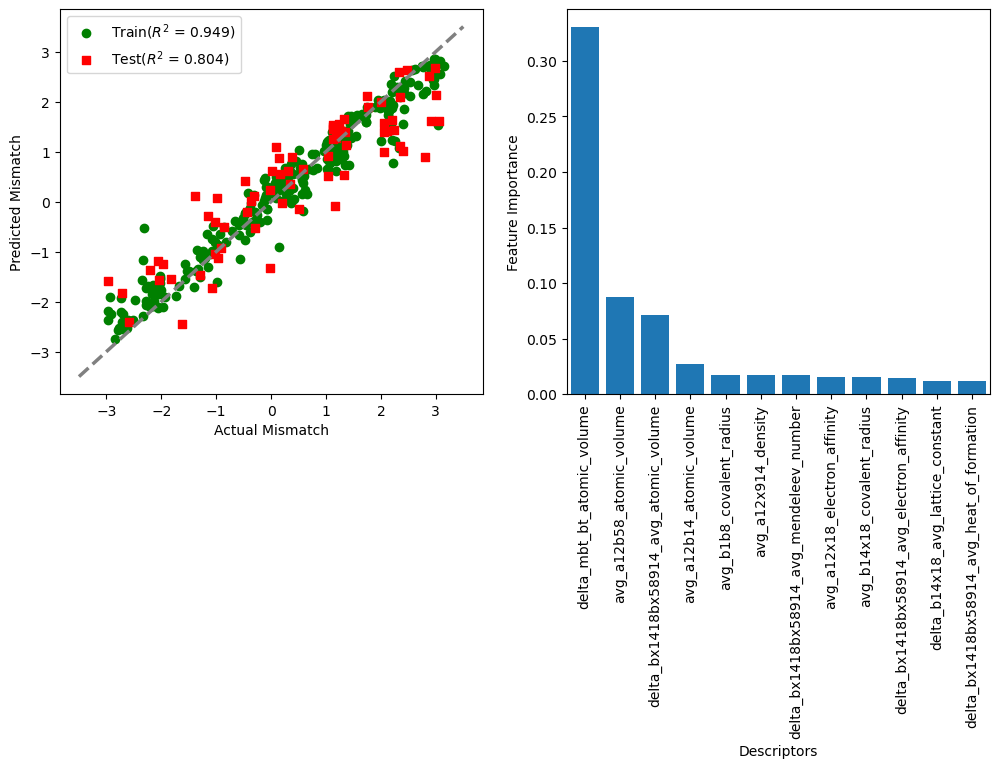

In [230]:
detailed_objective_rf(study_rf.best_trials[1])

R2 scores (train, CV, test) =  0.943356329601207 0.7341519548163256 0.8082978157817508
MAE values (train, test) =  0.2939906061182229 0.5390414110258375


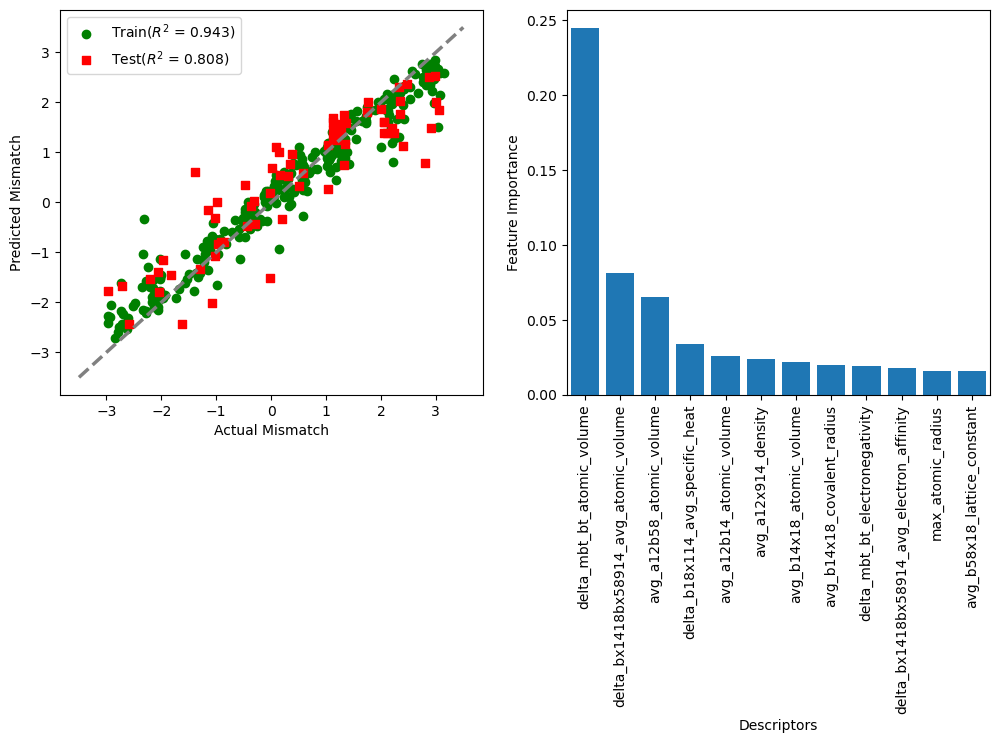

In [233]:
detailed_objective_rf(study_rf.best_trials[2])

In [213]:
## Features elimination

In [234]:
rf_be = RandomForestRegressor(random_state=42)
cv = KFold(n_splits=10,shuffle=True,random_state=42)
n_features = X_train_100.shape[1]

rf_sfs = sfs(rf_be,forward=False,k_features=(1,n_features),scoring='r2',cv=cv,verbose=2,n_jobs=-1)

rf_sfs = rf_sfs.fit(X_train_100_rf, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished

[2025-03-14 22:54:32] Features: 99/1 -- score: 0.7452265086422571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:  2.5min finished

[2025-03-14 22:57:03] Features: 98/1 -- score: 0.7456108779649624[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  98 out of  98 | elapsed:  2.5min finished

[2025-03-14 22:59:30] Features: 97/1 -- score: 0.7468840973596442[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  97 o

In [235]:
rf_sfs.get_metric_dict()

{100: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99),
  'cv_scores': array([0.63850966, 0.79655587, 0.81485732, 0.79340027, 0.70314737,
         0.7847148 , 0.61948047, 0.85548483, 0.5933543 , 0.7761767 ]),
  'avg_score': 0.7375681593133384,
  'feature_names': ('delta_mbt_bt_atomic_volume',
   'delta_bx1418bx58914_avg_atomic_volume',
   'del

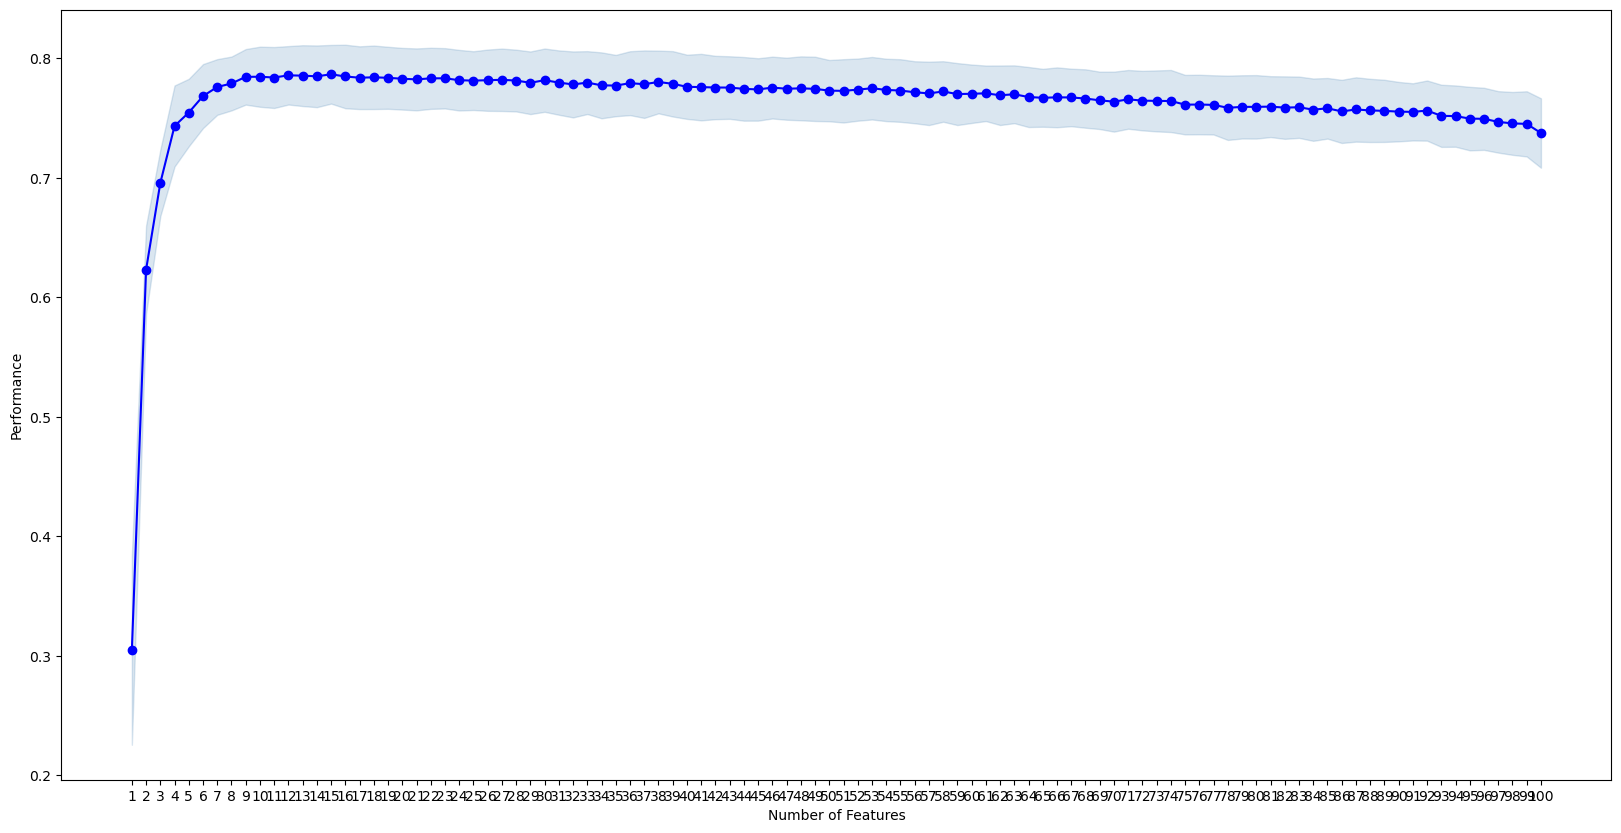

In [236]:
fig = plot_sfs(rf_sfs.get_metric_dict(),kind='std_err',figsize=(20,10))
plt.show()

In [237]:
rf_sfs.k_score_

0.7867305239637307

In [238]:
rf_sfs.k_feature_idx_

(0, 1, 2, 8, 14, 28, 34, 38, 41, 43, 67, 76, 80, 82, 96)

In [239]:
rf_sfs.k_feature_names_

('delta_mbt_bt_atomic_volume',
 'delta_bx1418bx58914_avg_atomic_volume',
 'delta_mbt_bt_dipole_polarizability',
 'std_unp_electrons',
 'std_electron_affinity',
 'delta_mbt_bt_heat_of_formation',
 'delta_mbt_bt_specific_heat',
 'delta_bx1418bx58914_avg_electron_affinity',
 'delta_mbt_bt_atomic_radius',
 'delta_a12b14_avg_melting_point',
 'delta_a12x18_avg_vdw_radius',
 'avg_a12b58_electron_affinity',
 'delta_a1a2_dipole_polarizability',
 'delta_mbt_bt_density',
 'delta_b58x18_avg_lattice_constant')

In [241]:
X_be_rf = X_rf[[i for i in rf_sfs.k_feature_names_]]
X_train_be_rf = X_train_100_rf[[i for i in rf_sfs.k_feature_names_]]
X_test_be_rf = X_test_100_rf[[i for i in rf_sfs.k_feature_names_]]

In [245]:
import optuna
import random

#X_train,X_test,y_train,y_test = train_test_split(X_be_rf,y,test_size=0.20,random_state=42)
X_train_be_rf = X_train[X_be_rf.columns]
X_test_be_rf = X_test[X_be_rf.columns]

def objective_be_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_be_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)
    
    # Train model
    be_rf_optuna = model_be_rf.fit(X_train_be_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_be_rf_optuna = cross_val_score(be_rf_optuna,X_train_be_rf,y_train,cv=cv,scoring='r2',n_jobs=-1)
    avg_r2_cv_be_rf_optuna = cv_scores_be_rf_optuna.mean()

    # Return best F1 scores
    r2_train_be_rf = r2_score(y_train, model_be_rf.predict(X_train_be_rf))
    r2_test_be_rf = r2_score(y_test, model_be_rf.predict(X_test_be_rf))
#    return avg_r2_cv_be_rf_optuna
    return r2_train_be_rf,avg_r2_cv_be_rf_optuna,r2_test_be_rf

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_be_rf = optuna.create_study(directions = ['maximize','maximize','maximize']) #(direction='maximize')
study_be_rf.optimize(objective_be_rf, n_trials=300)

[I 2025-03-15 00:18:21,953] A new study created in memory with name: no-name-e9b30b40-ef90-48f2-a230-a4e68664278b
[I 2025-03-15 00:18:25,567] Trial 0 finished with values: [0.7700219347559689, 0.5749240296474181, 0.6518829407118799] and parameters: {'n_estimators': 39, 'max_depth': 29, 'max_features': 1, 'min_samples_split': 6, 'min_samples_leaf': 4}.
[I 2025-03-15 00:18:27,694] Trial 1 finished with values: [0.9203895892536056, 0.7681816838742556, 0.7777568591786205] and parameters: {'n_estimators': 56, 'max_depth': 37, 'max_features': 31, 'min_samples_split': 8, 'min_samples_leaf': 4}.
[I 2025-03-15 00:18:28,261] Trial 2 finished with values: [0.931064081254201, 0.7744426406745004, 0.785881186719134] and parameters: {'n_estimators': 124, 'max_depth': 30, 'max_features': 24, 'min_samples_split': 9, 'min_samples_leaf': 2}.
[I 2025-03-15 00:18:28,557] Trial 3 finished with values: [0.8864620196465668, 0.7523726295250959, 0.7903458200183072] and parameters: {'n_estimators': 73, 'max_dept

In [246]:
best_models_be_rf = study_be_rf.best_trials
#PRINT('Trial number',
for i in range(len(best_models_be_rf)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_be_rf[i].number, '\nTrain R2:',best_models_be_rf[i].values[0],'\nValid R2:',best_models_be_rf[i].values[1],
         '\nTest  R2:',best_models_be_rf[i].values[2],'\nParams  :',best_models_be_rf[i].params,'\n=======')

Model No: 0 
Trial No: 85 
Train R2: 0.9687362100515025 
Valid R2: 0.7848113164334853 
Test  R2: 0.7886761331576513 
Params  : {'n_estimators': 145, 'max_depth': 16, 'max_features': 60, 'min_samples_split': 2, 'min_samples_leaf': 1} 
Model No: 1 
Trial No: 88 
Train R2: 0.9623278026735897 
Valid R2: 0.7827429138415998 
Test  R2: 0.8180857824371575 
Params  : {'n_estimators': 57, 'max_depth': 41, 'max_features': 8, 'min_samples_split': 3, 'min_samples_leaf': 1} 
Model No: 2 
Trial No: 141 
Train R2: 0.9679046834463365 
Valid R2: 0.785563324422 
Test  R2: 0.7898543621529382 
Params  : {'n_estimators': 124, 'max_depth': 16, 'max_features': 24, 'min_samples_split': 2, 'min_samples_leaf': 1} 
Model No: 3 
Trial No: 145 
Train R2: 0.9687375692446374 
Valid R2: 0.784663382664862 
Test  R2: 0.7881803650008086 
Params  : {'n_estimators': 145, 'max_depth': 37, 'max_features': 60, 'min_samples_split': 2, 'min_samples_leaf': 1} 
Model No: 4 
Trial No: 169 
Train R2: 0.9631995902463356 
Valid R2: 0

In [263]:
best_models_be_rf_pd = pd.DataFrame({'Trial number': [best_models_be_rf[i].number for i in range(len(best_models_be_rf))],
                                             'Train R2': [best_models_be_rf[i].values[0] for i in range(len(best_models_be_rf))],
                                             'Test R2': [best_models_be_rf[i].values[2] for i in range(len(best_models_be_rf))],
                                             'CV R2': [best_models_be_rf[i].values[1] for i in range(len(best_models_be_rf))],
                                             'n_estimators': [best_models_be_rf[i].params['n_estimators'] for i in range(len(best_models_be_rf))],
                                             'max_depth': [best_models_be_rf[i].params['max_depth'] for i in range(len(best_models_be_rf))],
                                             'max_features': [best_models_be_rf[i].params['max_features'] for i in range(len(best_models_be_rf))],
                                             'min_samples_split': [best_models_be_rf[i].params['min_samples_split'] for i in range(len(best_models_be_rf))],
                                             'min_samples_leaf': [best_models_be_rf[i].params['min_samples_leaf'] for i in range(len(best_models_be_rf))]
                                            })
best_models_be_rf_pd.to_excel('Results_Lattice_Mismatch/NEW_100_RFRegressor_X_HP_Optuna_BE.xlsx')

In [259]:
## import optuna
import random

def detailed_objective_be_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_be_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)


    
    model_be_rf = RandomForestRegressor(n_estimators=best_models_be_rf[17].params['n_estimators'],
                                    max_depth=best_models_be_rf[17].params['max_depth'],
                                    max_features=best_models_be_rf[17].params['max_features'],
                                    min_samples_split=best_models_be_rf[17].params['min_samples_split'],
                                    min_samples_leaf=best_models_be_rf[17].params['min_samples_leaf'],
                                    random_state=random_state)

    # Train model
    be_rf_optuna = model_be_rf.fit(X_train_be_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_be_rf_optuna = cross_val_score(be_rf_optuna,X_train_be_rf,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_be_rf_optuna = cv_scores_be_rf_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_be_rf = r2_score(y_train, model_be_rf.predict(X_train_be_rf))
    r2_test_be_rf = r2_score(y_test, model_be_rf.predict(X_test_be_rf))

    mae_train_be_rf = mean_absolute_error(y_train, model_be_rf.predict(X_train_be_rf))
    mae_test_be_rf = mean_absolute_error(y_test, model_be_rf.predict(X_test_be_rf))
    
    print('R2 scores (train, CV, test) = ', r2_train_be_rf,avg_r2_cv_be_rf_optuna,r2_test_be_rf)
    print('MAE values (train, test) = ', mae_train_be_rf,mae_test_be_rf) 

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train, model_be_rf.predict(X_train_be_rf).flatten(),label='Train($R^2$ = '+str(f'{r2_train_be_rf:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_test, model_be_rf.predict(X_test_be_rf).flatten(),label='Test($R^2$ = '+str(f'{r2_test_be_rf:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Actual Mismatch')
    ax1.set_ylabel('Predicted Mismatch')
    ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()

    importances_be_rf = model_be_rf.feature_importances_
    indices_be_rf = np.argsort(importances_be_rf)[::-1]    
    ax2.bar(range(12), importances_be_rf[indices_be_rf][:12], align='center')
    desc_labels_be_rf = X_train_be_rf.columns
    ax2.set_xticks(range(12), desc_labels_be_rf[indices_be_rf][:12],  rotation=90)
    ax2.set_xlim([-0.5, 11.5])
    ax2.set_ylabel('Feature Importance')
    ax2.set_xlabel('Descriptors')
    plt.show()

In [247]:
# 1,4,5,11,14,17

R2 scores (train, CV, test) =  0.9628622654832787 0.7620320425658341 0.8171856089736422
MAE values (train, test) =  0.23530190902577747 0.5104233117311249


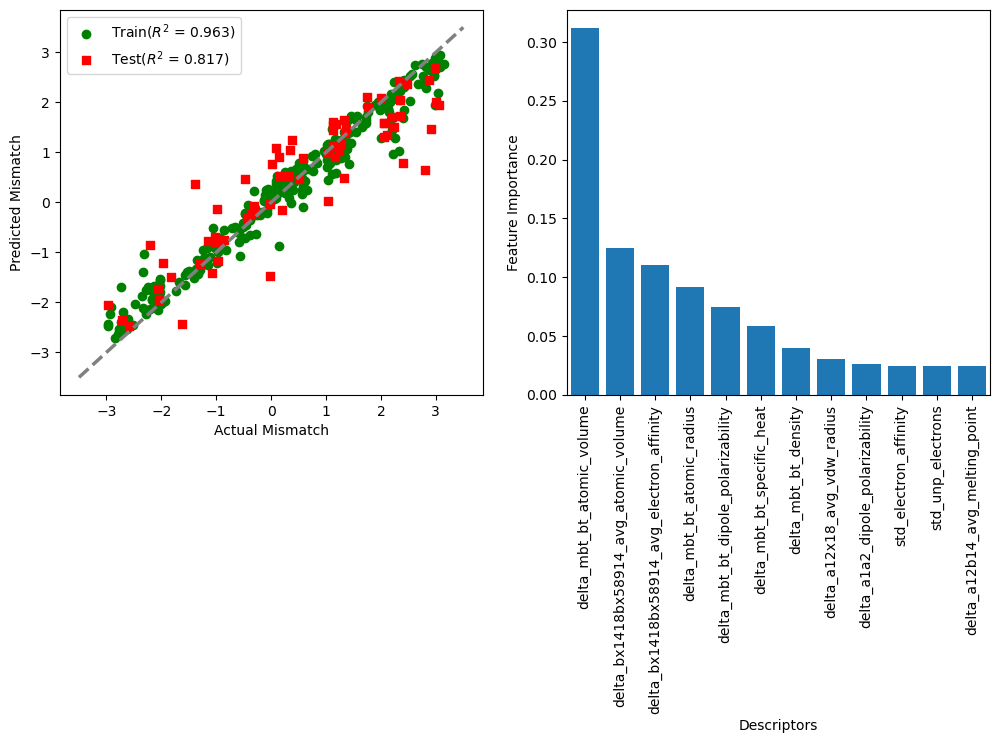

In [260]:
detailed_objective_be_rf(study_be_rf.best_trials[17])

R2 scores (train, CV, test) =  0.9642807521214867 0.7838150119550312 0.8146126024414317
MAE values (train, test) =  0.23866203580117415 0.5151014183883978


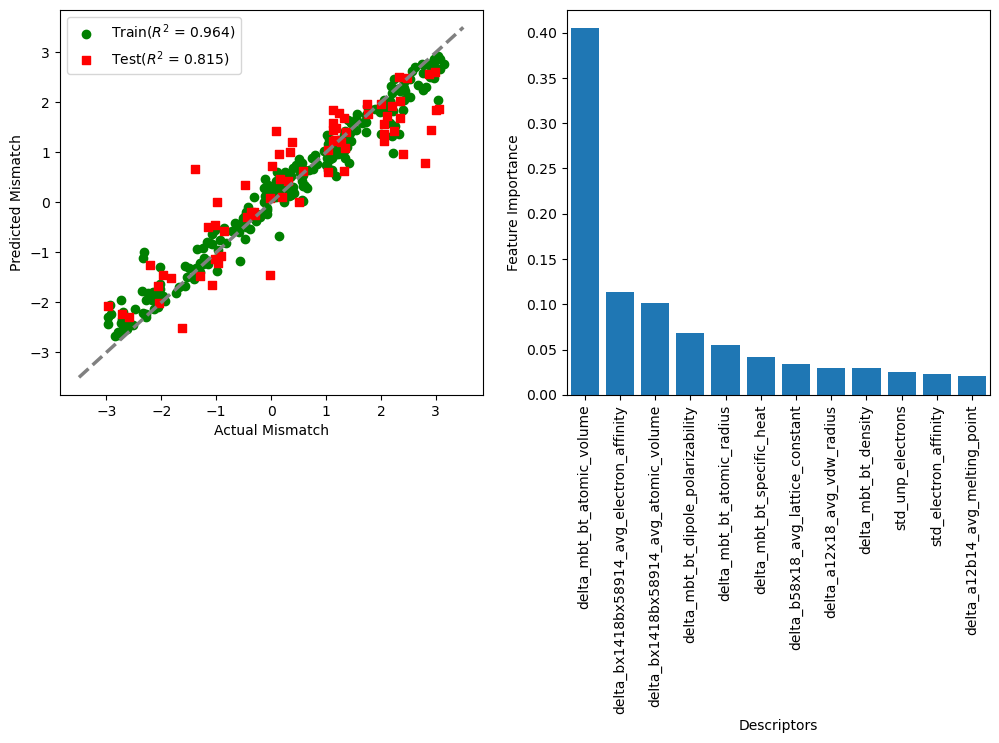

In [258]:
detailed_objective_be_rf(study_be_rf.best_trials[14])

R2 scores (train, CV, test) =  0.9678362367044324 0.7857346516383299 0.8109708068222685
MAE values (train, test) =  0.22486615268222243 0.5293808018906935


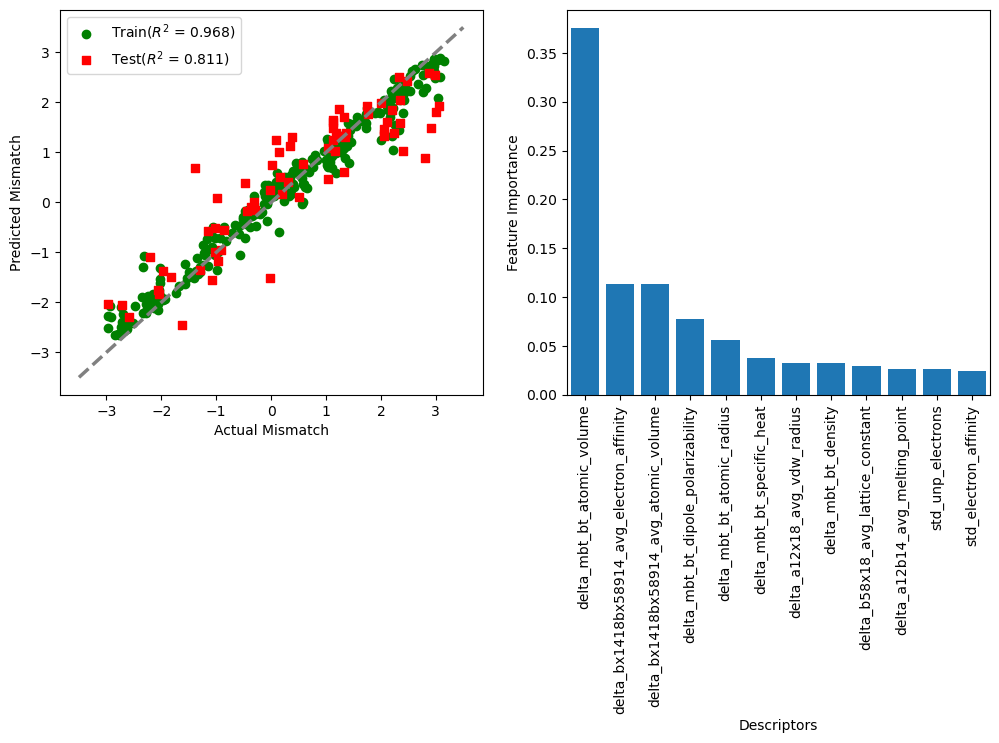

In [256]:
detailed_objective_be_rf(study_be_rf.best_trials[11])

R2 scores (train, CV, test) =  0.9679548320213991 0.7813951231848072 0.8046978585617468
MAE values (train, test) =  0.22847176890097529 0.5361417499628476


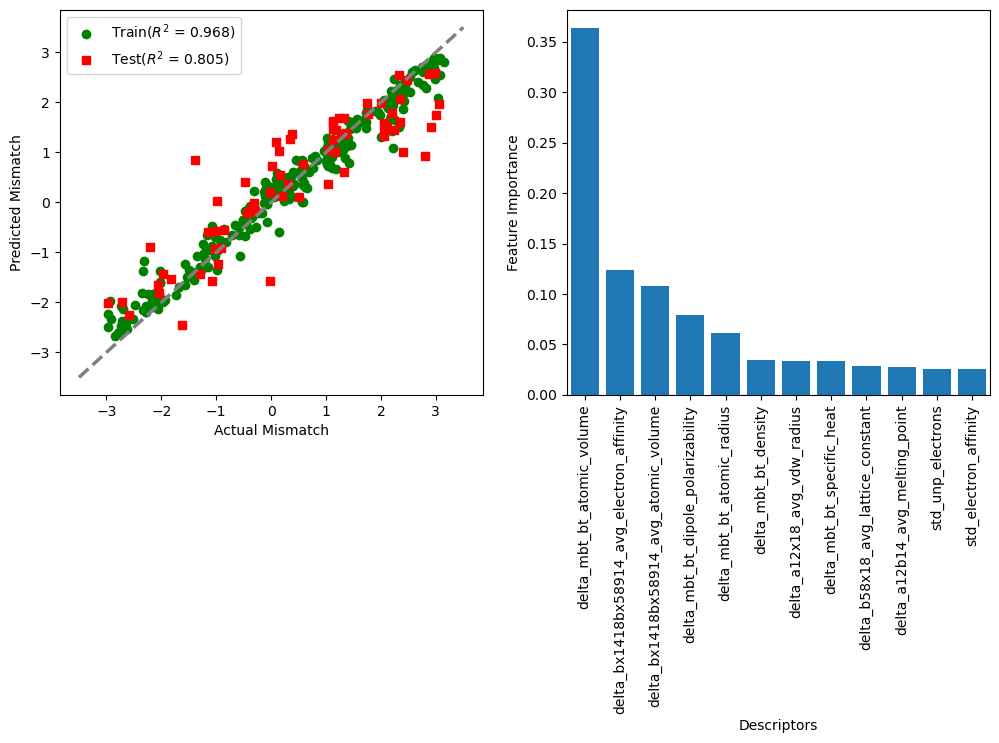

In [254]:
detailed_objective_be_rf(study_be_rf.best_trials[5])

R2 scores (train, CV, test) =  0.9631995902463356 0.760755845365284 0.815397917850416
MAE values (train, test) =  0.23527526084776745 0.5100081390381691


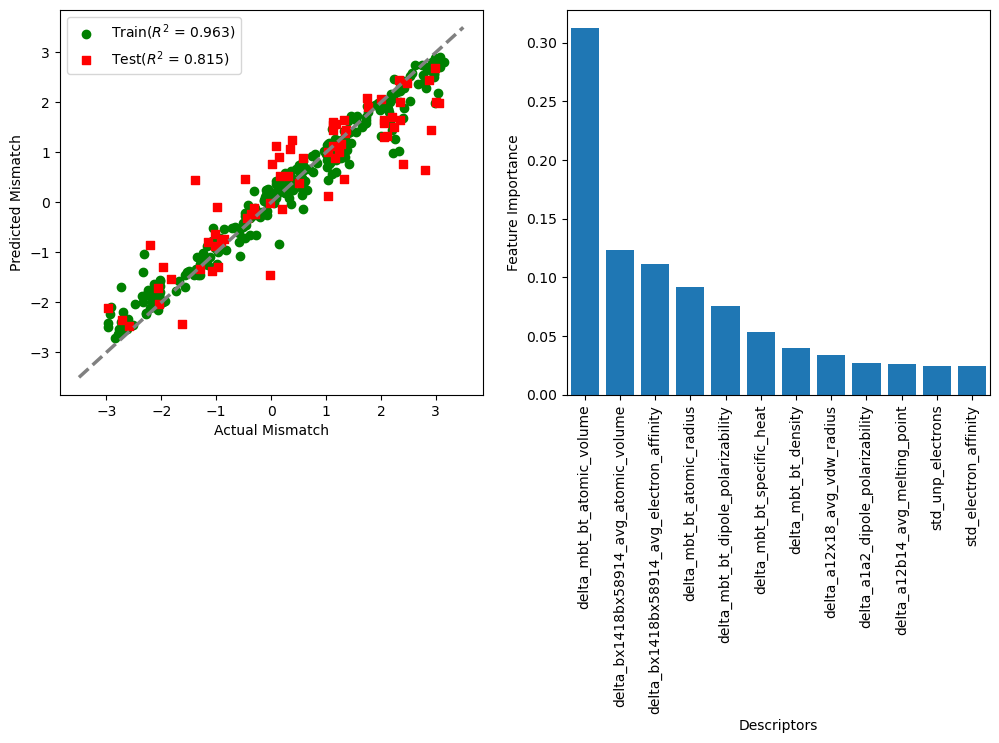

In [252]:
detailed_objective_be_rf(study_be_rf.best_trials[4])

R2 scores (train, CV, test) =  0.9623278026735897 0.7827429138415998 0.8180857824371575
MAE values (train, test) =  0.24397137294897167 0.5161555208772974


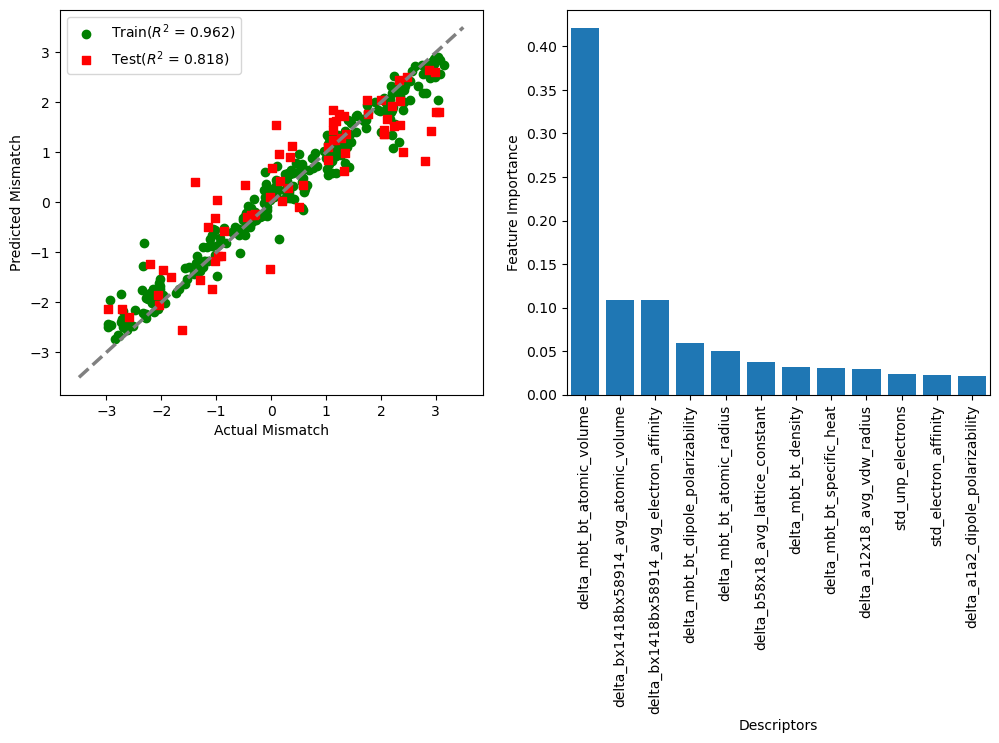

In [250]:
detailed_objective_be_rf(study_be_rf.best_trials[1])

In [261]:
## 1 is the best one

R2 scores (train, CV, test) =  0.9628622654832787 0.7620320425658341 0.8171856089736422
MAE values (train, test) =  0.23530190902577747 0.5104233117311249


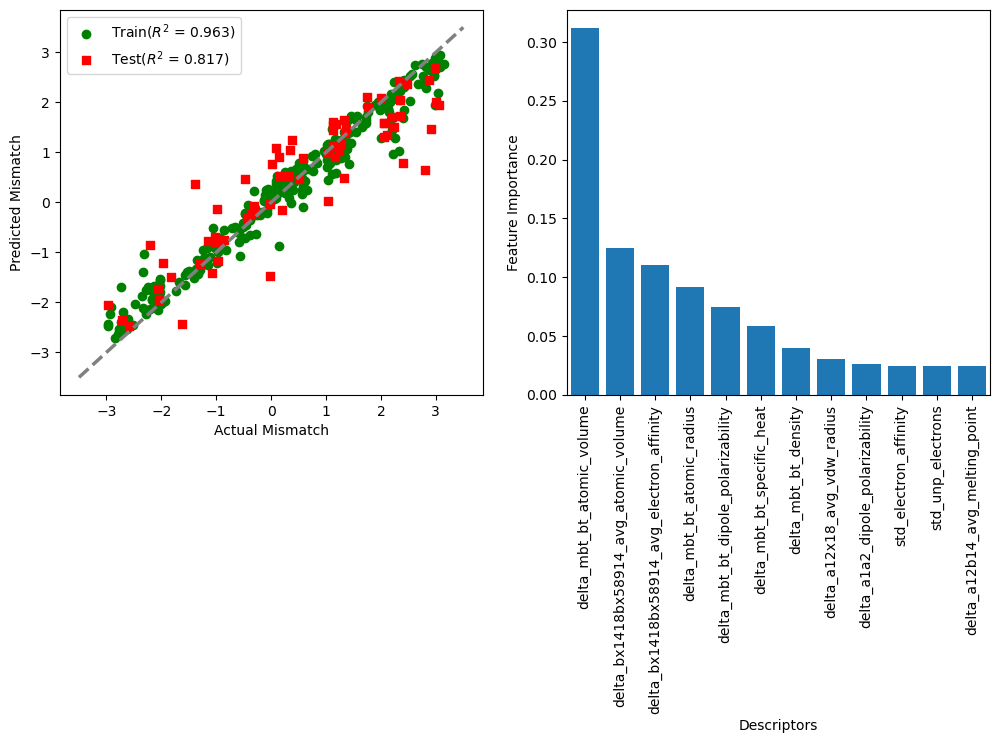

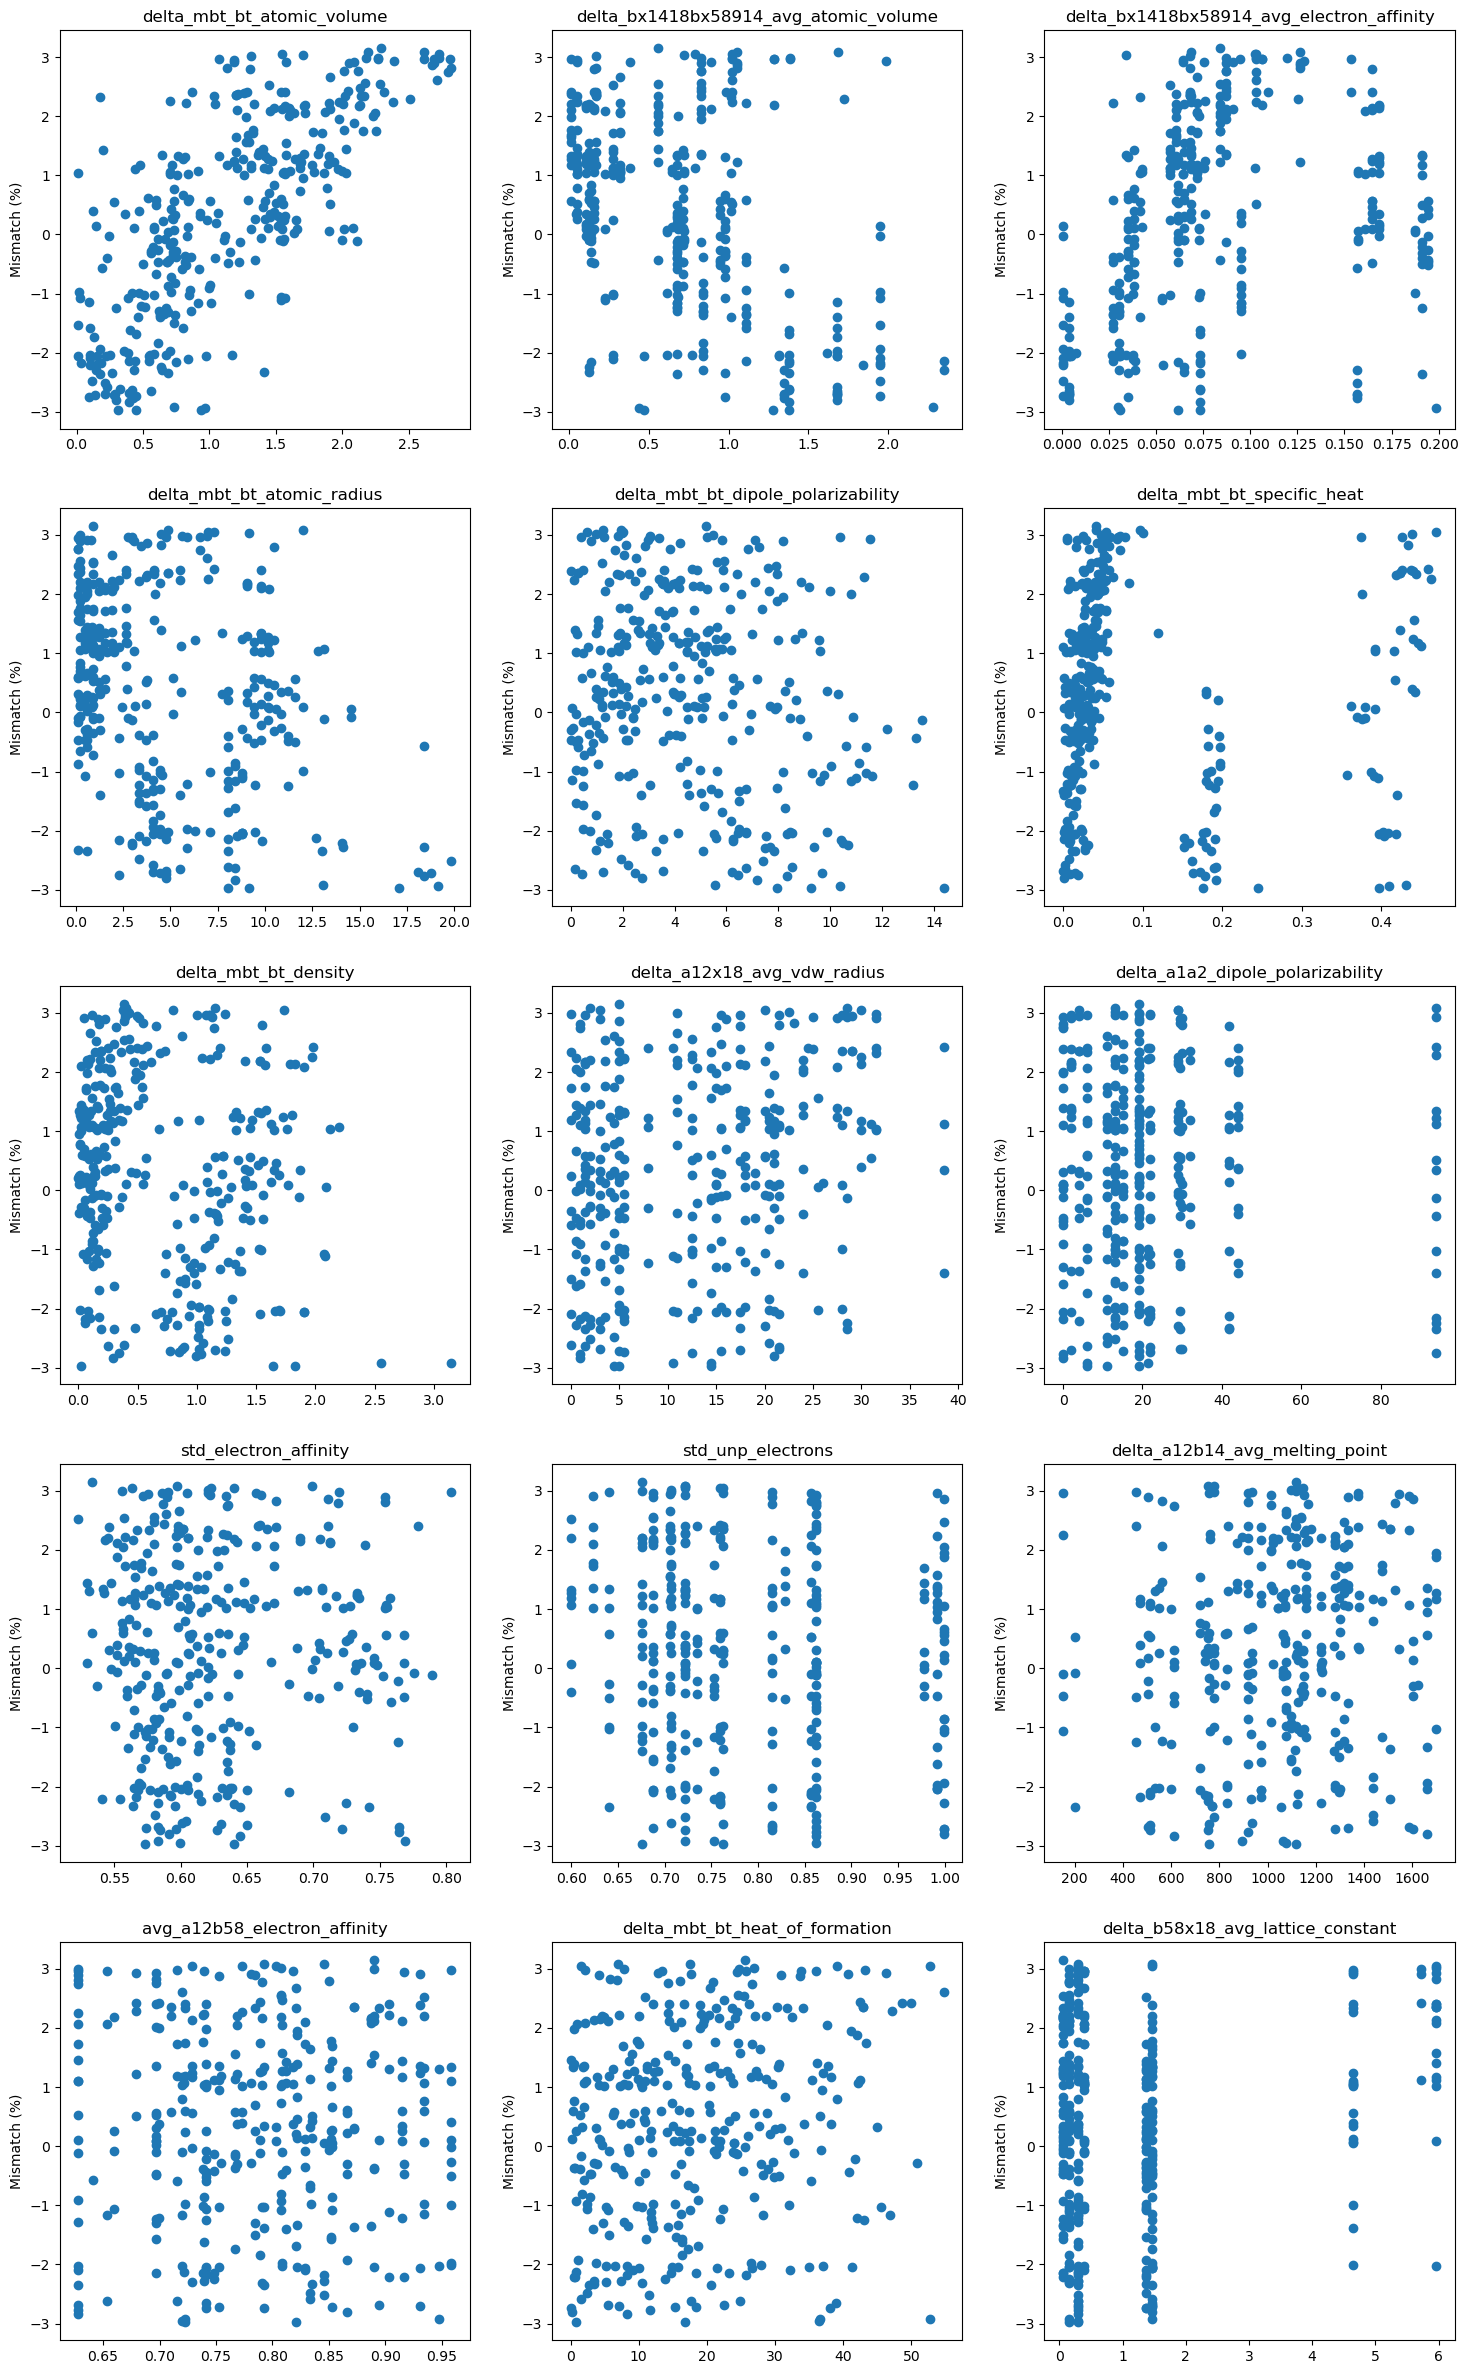

In [262]:
import optuna
import random

def detailed_objective_be_rf_best(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_be_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)


    
    model_be_rf = RandomForestRegressor(n_estimators=best_models_be_rf[17].params['n_estimators'],
                                    max_depth=best_models_be_rf[17].params['max_depth'],
                                    max_features=best_models_be_rf[17].params['max_features'],
                                    min_samples_split=best_models_be_rf[17].params['min_samples_split'],
                                    min_samples_leaf=best_models_be_rf[17].params['min_samples_leaf'],
                                    random_state=random_state)

    # Train model
    be_rf_optuna = model_be_rf.fit(X_train_be_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_be_rf_optuna = cross_val_score(be_rf_optuna,X_train_be_rf,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_be_rf_optuna = cv_scores_be_rf_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_be_rf = r2_score(y_train, model_be_rf.predict(X_train_be_rf))
    r2_test_be_rf = r2_score(y_test, model_be_rf.predict(X_test_be_rf))

    mae_train_be_rf = mean_absolute_error(y_train, model_be_rf.predict(X_train_be_rf))
    mae_test_be_rf = mean_absolute_error(y_test, model_be_rf.predict(X_test_be_rf))
    
    print('R2 scores (train, CV, test) = ', r2_train_be_rf,avg_r2_cv_be_rf_optuna,r2_test_be_rf)
    print('MAE values (train, test) = ', mae_train_be_rf,mae_test_be_rf) 

    ## Exporting the results
    y_pred_train_be_rf = model_be_rf.predict(X_train_be_rf)
    y_pred_test_be_rf = model_be_rf.predict(X_test_be_rf)

    X_train_be_rf.to_excel('Results_Lattice_Mismatch/X_train_Optuna_be_rf.xlsx',index=False)
    X_test_be_rf.to_excel('Results_Lattice_Mismatch/X_test_Optuna_be_rf.xlsx',index=False)      
    
    y_train.to_excel('Results_Lattice_Mismatch/y_train_Optuna_be_rf.xlsx',index=False)
    y_test.to_excel('Results_Lattice_Mismatch/y_test_Optuna_be_rf.xlsx',index=False)      
    
    pd.DataFrame(y_pred_train_be_rf).to_excel('Results_Lattice_Mismatch/y_pred_train_Optuna_be_rf_1.xlsx',index=False)
    pd.DataFrame(y_pred_test_be_rf).to_excel('Results_Lattice_Mismatch/y_pred_test_Optuna__be_rf_1.xlsx',index=False) 
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(y_train, model_be_rf.predict(X_train_be_rf).flatten(),label='Train($R^2$ = '+str(f'{r2_train_be_rf:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_test, model_be_rf.predict(X_test_be_rf).flatten(),label='Test($R^2$ = '+str(f'{r2_test_be_rf:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Actual Mismatch')
    ax1.set_ylabel('Predicted Mismatch')
    ax1.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()

    importances_be_rf = model_be_rf.feature_importances_
    indices_be_rf = np.argsort(importances_be_rf)[::-1]    
    ax2.bar(range(12), importances_be_rf[indices_be_rf][:12], align='center')
    desc_labels_be_rf = X_train_be_rf.columns
    ax2.set_xticks(range(12), desc_labels_be_rf[indices_be_rf][:12],  rotation=90)
    ax2.set_xlim([-0.5, 11.5])
    ax2.set_ylabel('Feature Importance')
    ax2.set_xlabel('Descriptors')
    plt.show()   

    fig,ax = plt.subplots(nrows = 5, ncols = 3,figsize = (18,30))
    nrows = 5
    ncols = 3
    count = 0
    for i in range(nrows):
        for j in range(ncols):
            
            ax[i,j].scatter(df_347[desc_labels_be_rf[indices_be_rf][count]],df_347['MBT_mismatch'])
            ax[i,j].set_xlabel(''), ax[i,j].set_ylabel('Mismatch (%)'), ax[i,j].set_title(desc_labels_be_rf[indices_be_rf][count])
            
            count = count+1
    
    plt.show()

detailed_objective_be_rf_best(study_be_rf.best_trials[1])

In [265]:
## predict the lattice mismatch

In [269]:
X_train_be_rf.columns

Index(['delta_mbt_bt_atomic_volume', 'delta_bx1418bx58914_avg_atomic_volume',
       'delta_mbt_bt_dipole_polarizability', 'std_unp_electrons',
       'std_electron_affinity', 'delta_mbt_bt_heat_of_formation',
       'delta_mbt_bt_specific_heat',
       'delta_bx1418bx58914_avg_electron_affinity',
       'delta_mbt_bt_atomic_radius', 'delta_a12b14_avg_melting_point',
       'delta_a12x18_avg_vdw_radius', 'avg_a12b58_electron_affinity',
       'delta_a1a2_dipole_polarizability', 'delta_mbt_bt_density',
       'delta_b58x18_avg_lattice_constant'],
      dtype='object')

In [270]:
candidates_891 = pd.read_csv('descriptors_for_891_candidates.csv')

In [278]:
## features_to_consider = X_train_be_rf.columns

features_to_consider = ['delta_mbt_bt_atomic_volume','delta_bx1418bx58914_avg_atomic_volume','delta_mbt_bt_dipole_pol','std_unp_electrons',
                        'std_electron_affinity','delta_mbt_bt_heat_of_formation','delta_mbt_bt_specific_heat','delta_bx1418bx58914_avg_electron_affinity',
                        'delta_mbt_bt_atomic_radius', 'delta_a12b14_avg_melting_point','delta_a12x18_avg_vdw_radius', 'avg_a12b58_electron_affinity',
                        'delta_a1a2_dipole_polarizability', 'delta_mbt_bt_density','delta_b58x18_avg_lattice_constant']

In [296]:
X_with_BE_features = candidates_891[features_to_consider]
X_with_BE_features = X_with_BE_features.rename(columns={"delta_mbt_bt_dipole_pol": "delta_mbt_bt_dipole_polarizability"})
y = candidates_891['MBT_mismatch']

In [297]:
X_with_BE_features

delta_mbt_bt_atomic_volume  delta_bx1418bx58914_avg_atomic_volume  \
0                      1.632857                               0.140000   
1                      0.832857                               0.946667   
2                      0.243571                               1.946667   
3                      1.117857                               0.106667   
4                      1.389286                               0.140000   
..                          ...                                    ...   
886                    0.149286                               1.380000   
887                    0.986429                               2.680000   
888                    0.313571                               1.380000   
889                    0.579286                               1.946667   
890                    0.207857                               0.713333   

     delta_mbt_bt_dipole_polarizability  std_unp_electrons  \
0                              3.714286           0.862007   
1                              1.928571           0.978058   
2                              0.214286           0.721688   
3                              6.928571           0.721688   
4                              5.857143           0.862007   
..                                  ...                ...   
886                            9.317143           0.862007   
887                            6.495714           0.640095   
888                            7.960000           0.862007   
889                            3.214286           0.721688   
890                            6.688571           0.721688   

     std_electron_affinity  delta_mbt_bt_heat_of_formation  \
0                 0.620920                        4.637143   
1                 0.699245                       21.698571   
2                 0.547252                       25.625714   
3                 0.731566                        8.384286   
4                 0.551905                       36.758571   
..                     ...                             ...   
886               0.578573                       40.318571   
887               0.530491                       14.064286   
888               0.599121                       36.390000   
889               0.609689                       18.990000   
890               0.606635                        0.857143   

     delta_mbt_bt_specific_heat  delta_bx1418bx58914_avg_electron_affinity  \
0                      0.039000                                   0.061658   
1                      0.006857                                   0.194521   
2                      0.010714                                   0.000686   
3                      0.023357                                   0.168094   
4                      0.023714                                   0.061658   
..                          ...                                        ...   
886                    0.013686                                   0.073237   
887                    0.041400                                   0.027378   
888                    0.032614                                   0.073237   
889                    0.013071                                   0.000686   
890                    0.014671                                   0.038551   

     delta_mbt_bt_atomic_radius  delta_a12b14_avg_melting_point  \
0                      0.571429                         615.372   
1                      9.428571                        1249.038   
2                      5.142857                         832.488   
3                     10.857143                        1066.038   
4                      0.214286                        1230.872   
..                          ...                             ...   
886                    8.785714                        1230.872   
887                   14.071429                        1438.460   
888                    8.071429                        1070.872   
889                

R2 scores (train, CV, test) =  0.9628622654832787 0.7620320425658341 0.8171856089736422


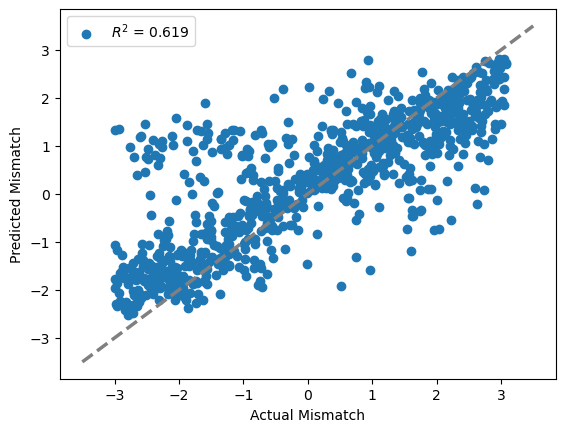

In [300]:
import optuna
import random

def detailed_objective_be_rf_final_pred(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_be_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)


    
    model_be_rf = RandomForestRegressor(n_estimators=best_models_be_rf[17].params['n_estimators'],
                                    max_depth=best_models_be_rf[17].params['max_depth'],
                                    max_features=best_models_be_rf[17].params['max_features'],
                                    min_samples_split=best_models_be_rf[17].params['min_samples_split'],
                                    min_samples_leaf=best_models_be_rf[17].params['min_samples_leaf'],
                                    random_state=random_state)

    # Train model
    be_rf_optuna = model_be_rf.fit(X_train_be_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_be_rf_optuna = cross_val_score(be_rf_optuna,X_train_be_rf,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_be_rf_optuna = cv_scores_be_rf_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_be_rf = r2_score(y_train, model_be_rf.predict(X_train_be_rf))
    r2_test_be_rf = r2_score(y_test, model_be_rf.predict(X_test_be_rf))
    
    print('R2 scores (train, CV, test) = ', r2_train_be_rf,avg_r2_cv_be_rf_optuna,r2_test_be_rf)

    ## Exporting the final results
    y_pred_be_rf_final = model_be_rf.predict(X_with_BE_features)
    
    y.to_csv('Final_predictions/y_be_rf_final_lattice_mismatch_new_100.csv',index=False)
    pd.DataFrame(y_pred_be_rf_final).to_csv('Final_predictions/y_pred_be_rf_final_lattice_mismatch_new_100.csv',index=False)

    plt.scatter(y, y_pred_be_rf_final,label='$R^2$ = '+str(f'{metrics.r2_score(y, y_pred_be_rf_final):.3f}'))
    plt.xlabel('Actual Mismatch')
    plt.ylabel('Predicted Mismatch')
    plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    plt.legend()
    plt.show()

detailed_objective_be_rf_final_pred(study_be_rf.best_trials[1])

In [302]:
## without Si

In [303]:
candidates_785 = pd.read_excel('descriptors_for_891_candidates.xlsx','without_Si')
X_with_best_features_be_785 = candidates_785[X_train_be_rf.columns]
y_785 = candidates_785['MBT_mismatch']

R2 scores (train, CV, test) =  0.9628622654832787 0.7620320425658341 0.8171856089736422


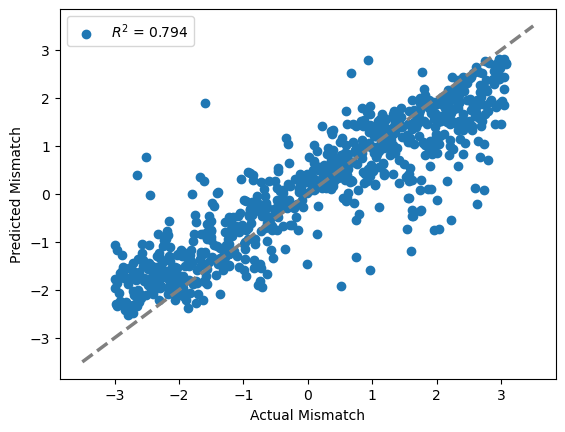

In [304]:
import optuna
import random

def detailed_objective_be_rf_final_pred_without_Si(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 150)
    max_depth = trial.suggest_int('max_depth',5,50)
    max_features = trial.suggest_int('max_features', 1, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 6)
    random_state = 42

    model_be_rf = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,random_state=random_state)


    
    model_be_rf = RandomForestRegressor(n_estimators=best_models_be_rf[17].params['n_estimators'],
                                    max_depth=best_models_be_rf[17].params['max_depth'],
                                    max_features=best_models_be_rf[17].params['max_features'],
                                    min_samples_split=best_models_be_rf[17].params['min_samples_split'],
                                    min_samples_leaf=best_models_be_rf[17].params['min_samples_leaf'],
                                    random_state=random_state)

    # Train model
    be_rf_optuna = model_be_rf.fit(X_train_be_rf,y_train)

    cv = KFold(n_splits=10,shuffle=True,random_state=random_state)
    cv_scores_be_rf_optuna = cross_val_score(be_rf_optuna,X_train_be_rf,y_train,cv=cv,scoring='r2',n_jobs=1)
    avg_r2_cv_be_rf_optuna = cv_scores_be_rf_optuna.mean()

    # Return best R2 scores and MAE
    r2_train_be_rf = r2_score(y_train, model_be_rf.predict(X_train_be_rf))
    r2_test_be_rf = r2_score(y_test, model_be_rf.predict(X_test_be_rf))
    
    print('R2 scores (train, CV, test) = ', r2_train_be_rf,avg_r2_cv_be_rf_optuna,r2_test_be_rf)

    ## Exporting the final results
    y_pred_be_rf_final_785 = model_be_rf.predict(X_with_best_features_be_785)
    
    y_785.to_csv('Final_predictions/y_be_rf_final_lattice_mismatch_without_Si_new_100.csv',index=False)
    pd.DataFrame(y_pred_be_rf_final_785).to_csv('Final_predictions/y_pred_be_rf_final_lattice_mismatch_without_Si_new_100.csv',index=False)

    plt.scatter(y_785, y_pred_be_rf_final_785,label='$R^2$ = '+str(f'{metrics.r2_score(y_785, y_pred_be_rf_final_785):.3f}'))
    plt.xlabel('Actual Mismatch')
    plt.ylabel('Predicted Mismatch')
    plt.plot([-3.5, 3.5], [-3.5, 3.5],linewidth=2.5, color='gray', linestyle='dashed')
    plt.legend()
    plt.show()

detailed_objective_be_rf_final_pred_without_Si(study_be_rf.best_trials[1])